# Lab 2

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import randint

Reading blosum50

In [2]:
blos_ind = pd.Series([el for el in "ARNDCQEGHILKMFPSTWYV"])
blos = pd.read_csv('blosum50.txt', header=None, names= blos_ind, sep = "\s+")
blos = blos.set_index(blos_ind)
blos

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V
A,5,-2,-1,-2,-1,-1,-1,0,-2,-1,-2,-1,-1,-3,-1,1,0,-3,-2,0
R,-2,7,-1,-2,-4,1,0,-3,0,-4,-3,3,-2,-3,-3,-1,-1,-3,-1,-3
N,-1,-1,7,2,-2,0,0,0,1,-3,-4,0,-2,-4,-2,1,0,-4,-2,-3
D,-2,-2,2,8,-4,0,2,-1,-1,-4,-4,-1,-4,-5,-1,0,-1,-5,-3,-4
C,-1,-4,-2,-4,13,-3,-3,-3,-3,-2,-2,-3,-2,-2,-4,-1,-1,-5,-3,-1
Q,-1,1,0,0,-3,7,2,-2,1,-3,-2,2,0,-4,-1,0,-1,-1,-1,-3
E,-1,0,0,2,-3,2,6,-3,0,-4,-3,1,-2,-3,-1,-1,-1,-3,-2,-3
G,0,-3,0,-1,-3,-2,-3,8,-2,-4,-4,-2,-3,-4,-2,0,-2,-3,-3,-4
H,-2,0,1,-1,-3,1,0,-2,10,-4,-3,0,-1,-1,-2,-1,-2,-3,2,-4
I,-1,-4,-3,-4,-2,-3,-4,-4,-4,5,2,-3,2,0,-3,-3,-1,-3,-1,4


## Task 1: Implement Needleman-Wunsch

Needleman-Wunsch algorithm

In [3]:
def get_higher(F,i,j):
    if i == 0:
        return np.NINF
    
    return F.iloc[i-1,j]-8

def get_left(F,i,j):
    if j == 0:
        return np.NINF
    
    return F.iloc[i,j-1]-8

def get_diag(F,i,j):
    if i == 0 or j == 0:
        if i == 0 and j == 0:
            return 0
        return np.NINF
    
    return F.iloc[i-1,j-1] + blos.loc[F.columns[j], F.index[i]]

def needleman_wunsch(x, y):
    x = [el for el in " " + x]
    y = [el for el in " " + y]
    
    F = pd.DataFrame(np.full((len(y),len(x)), np.NAN), index = y, columns = x)
    
    # Forwards
    for i in np.arange(len(F)):
        for j in np.arange(len(F.columns)):
            f1 = get_higher(F,i,j)
            f2 = get_left(F,i,j)
            f3 = get_diag(F,i,j)
            F.iloc[i,j] = max(f1, f2, f3)
    
    print(F)
            
    # Backwards
    pos = [len(F.index)-1, len(F.columns)-1]
    s_x = ""
    s_y = ""
    
    while True:
        print(pos)
        if pos[0] != 0:
            if F.iloc[pos[0]-1, pos[1]] - 8 == F.iloc[pos[0], pos[1]]:
                s_x = "-" + s_x
                s_y = F.index[pos[0]] + s_y
                pos[0] -= 1
                continue

        if pos[1] != 0:
            if (F.iloc[pos[0], pos[1]-1] - 8 == F.iloc[pos[0], pos[1]]):
                s_x = F.columns[pos[1]] + s_x
                s_y = "-" + s_y
                pos[1] -= 1
                continue

        if pos[0] == 0 and pos[1] == 0:
            return (s_x, s_y)

        s_x = F.columns[pos[1]] + s_x
        s_y = F.index[pos[0]] + s_y
        pos = [pos[0]-1, pos[1]-1]
    

In [4]:
needleman_wunsch("HEAGAWGHEE","PAWHEAE")

            H     E     A     G     A     W     G     H     E     E
    0.0  -8.0 -16.0 -24.0 -32.0 -40.0 -48.0 -56.0 -64.0 -72.0 -80.0
P  -8.0  -2.0  -9.0 -17.0 -25.0 -33.0 -41.0 -49.0 -57.0 -65.0 -73.0
A -16.0 -10.0  -3.0  -4.0 -12.0 -20.0 -28.0 -36.0 -44.0 -52.0 -60.0
W -24.0 -18.0 -11.0  -6.0  -7.0 -15.0  -5.0 -13.0 -21.0 -29.0 -37.0
H -32.0 -14.0 -18.0 -13.0  -8.0  -9.0 -13.0  -7.0  -3.0 -11.0 -19.0
E -40.0 -22.0  -8.0 -16.0 -16.0  -9.0 -12.0 -15.0  -7.0   3.0  -5.0
A -48.0 -30.0 -16.0  -3.0 -11.0 -11.0 -12.0 -12.0 -15.0  -5.0   2.0
E -56.0 -38.0 -24.0 -11.0  -6.0 -12.0 -14.0 -15.0 -12.0  -9.0   1.0
[7, 10]
[6, 9]
[5, 9]
[4, 8]
[3, 7]
[3, 6]
[2, 5]
[2, 4]
[2, 3]
[1, 2]
[0, 1]
[0, 0]


('HEAGAWGHE-E', '-PA--W-HEAE')

In [5]:
needleman_wunsch("SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL", "PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY")

              S      A      L      P      Q      P      T      T      P  \
     0.0   -8.0  -16.0  -24.0  -32.0  -40.0  -48.0  -56.0  -64.0  -72.0   
P   -8.0   -1.0   -9.0  -17.0  -14.0  -22.0  -30.0  -38.0  -46.0  -54.0   
S  -16.0   -3.0    0.0   -8.0  -16.0  -14.0  -22.0  -28.0  -36.0  -44.0   
P  -24.0  -11.0   -4.0   -4.0    2.0   -6.0   -4.0  -12.0  -20.0  -26.0   
T  -32.0  -19.0  -11.0   -5.0   -5.0    1.0   -7.0    1.0   -7.0  -15.0   
M  -40.0  -27.0  -19.0   -8.0   -8.0   -5.0   -2.0   -7.0    0.0   -8.0   
E  -48.0  -35.0  -27.0  -16.0   -9.0   -6.0   -6.0   -3.0   -8.0   -1.0   
A  -56.0  -43.0  -30.0  -24.0  -17.0  -10.0   -7.0   -6.0   -3.0   -9.0   
V  -64.0  -51.0  -38.0  -29.0  -25.0  -18.0  -13.0   -7.0   -6.0   -6.0   
T  -72.0  -59.0  -46.0  -37.0  -30.0  -26.0  -19.0   -8.0   -2.0   -7.0   
S  -80.0  -67.0  -54.0  -45.0  -38.0  -30.0  -27.0  -16.0   -6.0   -3.0   
V  -88.0  -75.0  -62.0  -53.0  -46.0  -38.0  -33.0  -24.0  -14.0   -9.0   
E  -96.0  -83.0  -70.0  -

('-SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL-', 'PSPTMEAVTSVEA-STASHPHSTSSYFATTYYHLY')

## Task 2: Smith-Waterman

In [6]:
def smith_waterman(x, y):
    x = [el for el in " " + x]
    y = [el for el in " " + y]
    
    F = pd.DataFrame(np.full((len(y),len(x)), np.NAN), index = y, columns = x)
    
    # Forwards
    for i in np.arange(len(F)):
        for j in np.arange(len(F.columns)):
            f1 = get_higher(F,i,j)
            f2 = get_left(F,i,j)
            f3 = get_diag(F,i,j)
            f4 = 0
            F.iloc[i,j] = max(f1, f2, f3, f4)
    
    print(F)
    
    # Backwards
    i,j = np.unravel_index(F.values.argmax(), F.values.shape)
    pos = [i,j]
    
    s_x = ""
    s_y = ""
    
    while True:
        print(pos)
        if pos[0] != 0:
            if F.iloc[pos[0]-1, pos[1]] - 8 == F.iloc[pos[0], pos[1]]:
                s_x = "-" + s_x
                s_y = F.index[pos[0]] + s_y
                pos[0] -= 1
                continue

        if pos[1] != 0:
            if (F.iloc[pos[0], pos[1]-1] - 8 == F.iloc[pos[0], pos[1]]):
                s_x = F.columns[pos[1]] + s_x
                s_y = "-" + s_y
                pos[1] -= 1
                continue

        if F.iloc[pos[0], pos[1]] == 0:
            return (s_x, s_y)

        s_x = F.columns[pos[1]] + s_x
        s_y = F.index[pos[0]] + s_y
        pos = [pos[0]-1, pos[1]-1]
    

In [7]:
smith_waterman("HEAGAWGHEE", "PAWHEAE")

           H     E     A     G     A     W     G     H     E     E
   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
P  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
A  0.0   0.0   0.0   5.0   0.0   5.0   0.0   0.0   0.0   0.0   0.0
W  0.0   0.0   0.0   0.0   2.0   0.0  20.0  12.0   4.0   0.0   0.0
H  0.0  10.0   2.0   0.0   0.0   0.0  12.0  18.0  22.0  14.0   6.0
E  0.0   2.0  16.0   8.0   0.0   0.0   4.0  10.0  18.0  28.0  20.0
A  0.0   0.0   8.0  21.0  13.0   5.0   0.0   4.0  10.0  20.0  27.0
E  0.0   0.0   6.0  13.0  18.0  12.0   4.0   0.0   4.0  16.0  26.0
[5, 9]
[4, 8]
[3, 7]
[3, 6]
[2, 5]
[1, 4]


('AWGHE', 'AW-HE')

In [8]:
smith_waterman("MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY", "TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI")

          M    Q    N    S     H     S     G     V     N  ...        G      C  \
   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...      0.0    0.0   
T  0.0  0.0  0.0  0.0  2.0   0.0   2.0   0.0   0.0   0.0  ...      0.0    0.0   
D  0.0  0.0  0.0  2.0  0.0   1.0   0.0   1.0   0.0   2.0  ...      0.0    0.0   
D  0.0  0.0  0.0  2.0  2.0   0.0   1.0   0.0   0.0   2.0  ...      3.0    0.0   
E  0.0  0.0  2.0  0.0  1.0   2.0   0.0   0.0   0.0   0.0  ...      0.0    0.0   
C  0.0  0.0  0.0  0.0  0.0   0.0   1.0   0.0   0.0   0.0  ...      0.0   13.0   
H  0.0  0.0  1.0  1.0  0.0  10.0   2.0   0.0   0.0   1.0  ...      0.0    5.0   
S  0.0  0.0  0.0  2.0  6.0   2.0  15.0   7.0   0.0   1.0  ...      1.0    0.0   
G  0.0  0.0  0.0  0.0  2.0   4.0   7.0  23.0  15.0   7.0  ...      9.0    1.0   
V  0.0  1.0  0.0  0.0  0.0   0.0   2.0  15.0  28.0  20.0  ...      1.0    8.0   
N  0.0  0.0  1.0  7.0  1.0   1.0   1.0   7.0  20.0  35.0  ...      0.0    0.0   
Q  0.0  0.0  7.0  1.0  7.0  

('HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRI',
 'HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI')

## Task 3: BLAST algorithm

Pax6 protein for the mouse:
> MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY
YETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSV
SSINRVLRNLASEKQQMGADGMYDKLRMLNGQTGSWGTRPGWYPGTSVPGQPTQDGCQQQ
EGGGENTNSISSNGEDSDEAQMRLQLKRKLQRNRTSFTQEQIEALEKEFERTHYPDVFAR
ERLAAKIDLPEARIQVWFSNRRAKWRREEKLRNQRRQASNTPSHIPISSSFSTSVYQPIP
QPTTPVSSFTSGSMLGRTDTALTNTYSALPPMPSFTMANNLPMQPPVPSQTSSYSCMLPT
SPSVNGRSYDTYTPPHMQTHMNSQPMGTSGTTSTGLISPGVSVPVQVPGSEPDMSQYWPR
LQ

Eyeless protein for the fruit fly:
> NVIAMRNLPCLGTAGGSGLGGIAGKPSPTMEAVEASTASHPHSTSSYFATTYYHLTDDEC
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI

Result:
> HSGVNQLGGVFV**N**GRPLPDSTRQKIVELAHSGARPCDISRI

> HSGVNQLGGVFV**G**GRPLPDSTRQKIVELAHSGARPCDISRI

From
> MQNS**HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRI**LQVSNGCVSKILGRY
YETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSV
SSINRVLRNLASEKQQMGADGMYDKLRMLNGQTGSWGTRPGWYPGTSVPGQPTQDGCQQQ
EGGGENTNSISSNGEDSDEAQMRLQLKRKLQRNRTSFTQEQIEALEKEFERTHYPDVFAR
ERLAAKIDLPEARIQVWFSNRRAKWRREEKLRNQRRQASNTPSHIPISSSFSTSVYQPIP
QPTTPVSSFTSGSMLGRTDTALTNTYSALPPMPSFTMANNLPMQPPVPSQTSSYSCMLPT
SPSVNGRSYDTYTPPHMQTHMNSQPMGTSGTTSTGLISPGVSVPVQVPGSEPDMSQYWPR
LQ

and

> NVIAMRNLPCLGTAGGSGLGGIAGKPSPTMEAVEASTASHPHSTSSYFATTYYHLTDDEC
**HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI**

## Task 4: Hidden Markov Model

In [12]:
def viterbi(epsilon):
    
    # Initialize problem
    e = {'A': (0.2698, 0.2459), 'T': (0.3237, 0.2079), 'C': (0.2080, 0.2478), 'G': (0.1985, 0.2984)}
    a = np.array([(0.9998,0.0002), (0.0003,0.9997)]) # a[i][j]
    q = []
    v = [np.array((np.log(0.5), np.log(0.5)))] # v[t][i]
    ptr = [] # ptr[t][i]
    
    # Forward
    for eps_t in epsilon:
        ptr.append( ( np.argmax(np.add(v[-1],np.log(a[:,0]))), np.argmax(np.add(v[-1],np.log(a[:,1]))) ) )
        v_prev = ( max(np.add( v[-1], np.log(a[:,0]) )), max(np.add( v[-1], np.log(a[:,1]) )) )
        v.append( np.add( np.log(e[eps_t]), v_prev ) )
    
    #print "v: " + str(v[-1])
    #print "ptr: " + str(ptr)
    print "\nP(eps, q*) = "+ str( max(v[-1]) )
    
    # Backwards
    q.append( np.argmax(v[-1]) )
    for t in np.arange(len(v)-2):
        q.insert(0, ptr[len(v)-2-t][q[0]])
    
    #print "q: " + str(q)
    return q
    

In [13]:
q = viterbi("GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAAGCAGCGCAACACCCTTATCTGGTTGCCGACGGATGGTGATGCCGAGAACTTTATGAAAACCCACGTTGAGCCGACTATTCGTGATATTCCGTCGCTGCTGGCGCTGGCCCCGTGGTATGGCAAAAAGCACCGGGATAACACGCTCACCATGAAGCGTTTCACTAATGGGCGTGGCTTCTGGTGCCTGGGCGGTAAAGCGGCAAAAAACTACCGTGAAAAGTCGGTGGATGTGGCGGGTTATGATGAACTTGCTGCTTTTGATGATGATATTGAACAGGAAGGCTCTCCGACGTTCCTGGGTGACAAGCGTATTGAAGGCTCGGTCTGGCCAAAGTCCATCCGTGGCTCCACGCCAAAAGTGAGAGGCACCTGTCAGATTGAGCGTGCAGCCAGTGAATCCCCGCATTTTATGCGTTTTCATGTTGCCTGCCCGCATTGCGGGGAGGAGCAGTATCTTAAATTTGGCGACAAAGAGACGCCGTTTGGCCTCAAATGGACGCCGGATGACCCCTCCAGCGTGTTTTATCTCTGCGAGCATAATGCCTGCGTCATCCGCCAGCAGGAGCTGGACTTTACTGATGCCCGTTATATCTGCGAAAAGACCGGGATCTGGACCCGTGATGGCATTCTCTGGTTTTCGTCATCCGGTGAAGAGATTGAGCCACCTGACAGTGTGACCTTTCACATCTGGACAGCGTACAGCCCGTTCACCACCTGGGTGCAGATTGTCAAAGACTGGATGAAAACGAAAGGGGATACGGGAAAACGTAAAACCTTCGTAAACACCACGCTCGGTGAGACGTGGGAGGCGAAAATTGGCGAACGTCCGGATGCTGAAGTGATGGCAGAGCGGAAAGAGCATTATTCAGCGCCCGTTCCTGACCGTGTGGCTTACCTGACCGCCGGTATCGACTCCCAGCTGGACCGCTACGAAATGCGCGTATGGGGATGGGGGCCGGGTGAGGAAAGCTGGCTGATTGACCGGCAGATTATTATGGGCCGCCACGACGATGAACAGACGCTGCTGCGTGTGGATGAGGCCATCAATAAAACCTATACCCGCCGGAATGGTGCAGAAATGTCGATATCCCGTATCTGCTGGGATACTGGCGGGATTGACCCGACCATTGTGTATGAACGCTCGAAAAAACATGGGCTGTTCCGGGTGATCCCCATTAAAGGGGCATCCGTCTACGGAAAGCCGGTGGCCAGCATGCCACGTAAGCGAAACAAAAACGGGGTTTACCTTACCGAAATCGGTACGGATACCGCGAAAGAGCAGATTTATAACCGCTTCACACTGACGCCGGAAGGGGATGAACCGCTTCCCGGTGCCGTTCACTTCCCGAATAACCCGGATATTTTTGATCTGACCGAAGCGCAGCAGCTGACTGCTGAAGAGCAGGTCGAAAAATGGGTGGATGGCAGGAAAAAAATACTGTGGGACAGCAAAAAGCGACGCAATGAGGCACTCGACTGCTTCGTTTATGCGCTGGCGGCGCTGCGCATCAGTATTTCCCGCTGGCAGCTGGATCTCAGTGCGCTGCTGGCGAGCCTGCAGGAAGAGGATGGTGCAGCAACCAACAAGAAAACACTGGCAGATTACGCCCGTGCCTTATCCGGAGAGGATGAATGACGCGACAGGAAGAACTTGCCGCTGCCCGTGCGGCACTGCATGACCTGATGACAGGTAAACGGGTGGCAACAGTACAGAAAGACGGACGAAGGGTGGAGTTTACGGCCACTTCCGTGTCTGACCTGAAAAAATATATTGCAGAGCTGGAAGTGCAGACCGGCATGACACAGCGACGCAGGGGACCTGCAGGATTTTATGTATGAAAACGCCCACCATTCCCACCCTTCTGGGGCCGGACGGCATGACATCGCTGCGCGAATATGCCGGTTATCACGGCGGTGGCAGCGGATTTGGAGGGCAGTTGCGGTCGTGGAACCCACCGAGTGAAAGTGTGGATGCAGCCCTGTTGCCCAACTTTACCCGTGGCAATGCCCGCGCAGACGATCTGGTACGCAATAACGGCTATGCCGCCAACGCCATCCAGCTGCATCAGGATCATATCGTCGGGTCTTTTTTCCGGCTCAGTCATCGCCCAAGCTGGCGCTATCTGGGCATCGGGGAGGAAGAAGCCCGTGCCTTTTCCCGCGAGGTTGAAGCGGCATGGAAAGAGTTTGCCGAGGATGACTGCTGCTGCATTGACGTTGAGCGAAAACGCACGTTTACCATGATGATTCGGGAAGGTGTGGCCATGCACGCCTTTAACGGTGAACTGTTCGTTCAGGCCACCTGGGATACCAGTTCGTCGCGGCTTTTCCGGACACAGTTCCGGATGGTCAGCCCGAAGCGCATCAGCAACCCGAACAATACCGGCGACAGCCGGAACTGCCGTGCCGGTGTGCAGATTAATGACAGCGGTGCGGCGCTGGGATATTACGTCAGCGAGGACGGGTATCCTGGCTGGATGCCGCAGAAATGGACATGGATACCCCGTGAGTTACCCGGCGGGCGCGCCTCGTTCATTCACGTTTTTGAACCCGTGGAGGACGGGCAGACTCGCGGTGCAAATGTGTTTTACAGCGTGATGGAGCAGATGAAGATGCTCGACACGCTGCAGAACACGCAGCTGCAGAGCGCCATTGTGAAGGCGATGTATGCCGCCACCATTGAGAGTGAGCTGGATACGCAGTCAGCGATGGATTTTATTCTGGGCGCGAACAGTCAGGAGCAGCGGGAAAGGCTGACCGGCTGGATTGGTGAAATTGCCGCGTATTACGCCGCAGCGCCGGTCCGGCTGGGAGGCGCAAAAGTACCGCACCTGATGCCGGGTGACTCACTGAACCTGCAGACGGCTCAGGATACGGATAACGGCTACTCCGTGTTTGAGCAGTCACTGCTGCGGTATATCGCTGCCGGGCTGGGTGTCTCGTATGAGCAGCTTTCCCGGAATTACGCCCAGATGAGCTACTCCACGGCACGGGCCAGTGCGAACGAGTCGTGGGCGTACTTTATGGGGCGGCGAAAATTCGTCGCATCCCGTCAGGCGAGCCAGATGTTTCTGTGCTGGCTGGAAGAGGCCATCGTTCGCCGCGTGGTGACGTTACCTTCAAAAGCGCGCTTCAGTTTTCAGGAAGCCCGCAGTGCCTGGGGGAACTGCGACTGGATAGGCTCCGGTCGTATGGCCATCGATGGTCTGAAAGAAGTTCAGGAAGCGGTGATGCTGATAGAAGCCGGACTGAGTACCTACGAGAAAGAGTGCGCAAAACGCGGTGACGACTATCAGGAAATTTTTGCCCAGCAGGTCCGTGAAACGATGGAGCGCCGTGCAGCCGGTCTTAAACCGCCCGCCTGGGCGGCTGCAGCATTTGAATCCGGGCTGCGACAATCAACAGAGGAGGAGAAGAGTGACAGCAGAGCTGCGTAATCTCCCGCATATTGCCAGCATGGCCTTTAATGAGCCGCTGATGCTTGAACCCGCCTATGCGCGGGTTTTCTTTTGTGCGCTTGCAGGCCAGCTTGGGATCAGCAGCCTGACGGATGCGGTGTCCGGCGACAGCCTGACTGCCCAGGAGGCACTCGCGACGCTGGCATTATCCGGTGATGATGACGGACCACGACAGGCCCGCAGTTATCAGGTCATGAACGGCATCGCCGTGCTGCCGGTGTCCGGCACGCTGGTCAGCCGGACGCGGGCGCTGCAGCCGTACTCGGGGATGACCGGTTACAACGGCATTATCGCCCGTCTGCAACAGGCTGCCAGCGATCCGATGGTGGACGGCATTCTGCTCGATATGGACACGCCCGGCGGGATGGTGGCGGGGGCATTTGACTGCGCTGACATCATCGCCCGTGTGCGTGACATAAAACCGGTATGGGCGCTTGCCAACGACATGAACTGCAGTGCAGGTCAGTTGCTTGCCAGTGCCGCCTCCCGGCGTCTGGTCACGCAGACCGCCCGGACAGGCTCCATCGGCGTCATGATGGCTCACAGTAATTACGGTGCTGCGCTGGAGAAACAGGGTGTGGAAATCACGCTGATTTACAGCGGCAGCCATAAGGTGGATGGCAACCCCTACAGCCATCTTCCGGATGACGTCCGGGAGACACTGCAGTCCCGGATGGACGCAACCCGCCAGATGTTTGCGCAGAAGGTGTCGGCATATACCGGCCTGTCCGTGCAGGTTGTGCTGGATACCGAGGCTGCAGTGTACAGCGGTCAGGAGGCCATTGATGCCGGACTGGCTGATGAACTTGTTAACAGCACCGATGCGATCACCGTCATGCGTGATGCACTGGATGCACGTAAATCCCGTCTCTCAGGAGGGCGAATGACCAAAGAGACTCAATCAACAACTGTTTCAGCCACTGCTTCGCAGGCTGACGTTACTGACGTGGTGCCAGCGACGGAGGGCGAGAACGCCAGCGCGGCGCAGCCGGACGTGAACGCGCAGATCACCGCAGCGGTTGCGGCAGAAAACAGCCGCATTATGGGGATCCTCAACTGTGAGGAGGCTCACGGACGCGAAGAACAGGCACGCGTGCTGGCAGAAACCCCCGGTATGACCGTGAAAACGGCCCGCCGCATTCTGGCCGCAGCACCACAGAGTGCACAGGCGCGCAGTGACACTGCGCTGGATCGTCTGATGCAGGGGGCACCGGCACCGCTGGCTGCAGGTAACCCGGCATCTGATGCCGTTAACGATTTGCTGAACACACCAGTGTAAGGGATGTTTATGACGAGCAAAGAAACCTTTACCCATTACCAGCCGCAGGGCAACAGTGACCCGGCTCATACCGCAACCGCGCCCGGCGGATTGAGTGCGAAAGCGCCTGCAATGACCCCGCTGATGCTGGACACCTCCAGCCGTAAGCTGGTTGCGTGGGATGGCACCACCGACGGTGCTGCCGTTGGCATTCTTGCGGTTGCTGCTGACCAGACCAGCACCACGCTGACGTTCTACAAGTCCGGCACGTTCCGTTATGAGGATGTGCTCTGGCCGGAGGCTGCCAGCGACGAGACGAAAAAACGGACCGCGTTTGCCGGAACGGCAATCAGCATCGTTTAACTTTACCCTTCATCACTAAAGGCCGCCTGTGCGGCTTTTTTTACGGGATTTTTTTATGTCGATGTACACAACCGCCCAACTGCTGGCGGCAAATGAGCAGAAATTTAAGTTTGATCCGCTGTTTCTGCGTCTCTTTTTCCGTGAGAGCTATCCCTTCACCACGGAGAAAGTCTATCTCTCACAAATTCCGGGACTGGTAAACATGGCGCTGTACGTTTCGCCGATTGTTTCCGGTGAGGTTATCCGTTCCCGTGGCGGCTCCACCTCTGAATTTACGCCGGGATATGTCAAGCCGAAGCATGAAGTGAATCCGCAGATGACCCTGCGTCGCCTGCCGGATGAAGATCCGCAGAATCTGGCGGACCCGGCTTACCGCCGCCGTCGCATCATCATGCAGAACATGCGTGACGAAGAGCTGGCCATTGCTCAGGTCGAAGAGATGCAGGCAGTTTCTGCCGTGCTTAAGGGCAAATACACCATGACCGGTGAAGCCTTCGATCCGGTTGAGGTGGATATGGGCCGCAGTGAGGAGAATAACATCACGCAGTCCGGCGGCACGGAGTGGAGCAAGCGTGACAAGTCCACGTATGACCCGACCGACGATATCGAAGCCTACGCGCTGAACGCCAGCGGTGTGGTGAATATCATCGTGTTCGATCCGAAAGGCTGGGCGCTGTTCCGTTCCTTCAAAGCCGTCAAGGAGAAGCTGGATACCCGTCGTGGCTCTAATTCCGAGCTGGAGACAGCGGTGAAAGACCTGGGCAAAGCGGTGTCCTATAAGGGGATGTATGGCGATGTGGCCATCGTCGTGTATTCCGGACAGTACGTGGAAAACGGCGTCAAAAAGAACTTCCTGCCGGACAACACGATGGTGCTGGGGAACACTCAGGCACGCGGTCTGCGCACCTATGGCTGCATTCAGGATGCGGACGCACAGCGCGAAGGCATTAACGCCTCTGCCCGTTACCCGAAAAACTGGGTGACCACCGGCGATCCGGCGCGTGAGTTCACCATGATTCAGTCAGCACCGCTGATGCTGCTGGCTGACCCTGATGAGTTCGTGTCCGTACAACTGGCGTAATCATGGCCCTTCGGGGCCATTGTTTCTCTGTGGAGGAGTCCATGACGAAAGATGAACTGATTGCCCGTCTCCGCTCGCTGGGTGAACAACTGAACCGTGATGTCAGCCTGACGGGGACGAAAGAAGAACTGGCGCTCCGTGTGGCAGAGCTGAAAGAGGAGCTTGATGACACGGATGAAACTGCCGGTCAGGACACCCCTCTCAGCCGGGAAAATGTGCTGACCGGACATGAAAATGAGGTGGGATCAGCGCAGCCGGATACCGTGATTCTGGATACGTCTGAACTGGTCACGGTCGTGGCACTGGTGAAGCTGCATACTGATGCACTTCACGCCACGCGGGATGAACCTGTGGCATTTGTGCTGCCGGGAACGGCGTTTCGTGTCTCTGCCGGTGTGGCAGCCGAAATGACAGAGCGCGGCCTGGCCAGAATGCAATAACGGGAGGCGCTGTGGCTGATTTCGATAACCTGTTCGATGCTGCCATTGCCCGCGCCGATGAAACGATACGCGGGTACATGGGAACGTCAGCCACCATTACATCCGGTGAGCAGTCAGGTGCGGTGATACGTGGTGTTTTTGATGACCCTGAAAATATCAGCTATGCCGGACAGGGCGTGCGCGTTGAAGGCTCCAGCCCGTCCCTGTTTGTCCGGACTGATGAGGTGCGGCAGCTGCGGCGTGGAGACACGCTGACCATCGGTGAGGAAAATTTCTGGGTAGATCGGGTTTCGCCGGATGATGGCGGAAGTTGTCATCTCTGGCTTGGACGGGGCGTACCGCCTGCCGTTAACCGTCGCCGCTGAAAGGGGGATGTATGGCCATAAAAGGTCTTGAGCAGGCCGTTGAAAACCTCAGCCGTATCAGCAAAACGGCGGTGCCTGGTGCCGCCGCAATGGCCATTAACCGCGTTGCTTCATCCGCGATATCGCAGTCGGCGTCACAGGTTGCCCGTGAGACAAAGGTACGCCGGAAACTGGTAAAGGAAAGGGCCAGGCTGAAAAGGGCCACGGTCAAAAATCCGCAGGCCAGAATCAAAGTTAACCGGGGGGATTTGCCCGTAATCAAGCTGGGTAATGCGCGGGTTGTCCTTTCGCGCCGCAGGCGTCGTAAAAAGGGGCAGCGTTCATCCCTGAAAGGTGGCGGCAGCGTGCTTGTGGTGGGTAACCGTCGTATTCCCGGCGCGTTTATTCAGCAACTGAAAAATGGCCGGTGGCATGTCATGCAGCGTGTGGCTGGGAAAAACCGTTACCCCATTGATGTGGTGAAAATCCCGATGGCGGTGCCGCTGACCACGGCGTTTAAACAAAATATTGAGCGGATACGGCGTGAACGTCTTCCGAAAGAGCTGGGCTATGCGCTGCAGCATCAACTGAGGATGGTAATAAAGCGATGAAACATACTGAACTCCGTGCAGCCGTACTGGATGCACTGGAGAAGCATGACACCGGGGCGACGTTTTTTGATGGTCGCCCCGCTGTTTTTGATGAGGCGGATTTTCCGGCAGTTGCCGTTTATCTCACCGGCGCTGAATACACGGGCGAAGAGCTGGACAGCGATACCTGGCAGGCGGAGCTGCATATCGAAGTTTTCCTGCCTGCTCAGGTGCCGGATTCAGAGCTGGATGCGTGGATGGAGTCCCGGATTTATCCGGTGATGAGCGATATCCCGGCACTGTCAGATTTGATCACCAGTATGGTGGCCAGCGGCTATGACTACCGGCGCGACGATGATGCGGGCTTGTGGAGTTCAGCCGATCTGACTTATGTCATTACCTATGAAATGTGAGGACGCTATGCCTGTACCAAATCCTACAATGCCGGTGAAAGGTGCCGGGACCACCCTGTGGGTTTATAAGGGGAGCGGTGACCCTTACGCGAATCCGCTTTCAGACGTTGACTGGTCGCGTCTGGCAAAAGTTAAAGACCTGACGCCCGGCGAACTGACCGCTGAGTCCTATGACGACAGCTATCTCGATGATGAAGATGCAGACTGGACTGCGACCGGGCAGGGGCAGAAATCTGCCGGAGATACCAGCTTCACGCTGGCGTGGATGCCCGGAGAGCAGGGGCAGCAGGCGCTGCTGGCGTGGTTTAATGAAGGCGATACCCGTGCCTATAAAATCCGCTTCCCGAACGGCACGGTCGATGTGTTCCGTGGCTGGGTCAGCAGTATCGGTAAGGCGGTGACGGCGAAGGAAGTGATCACCCGCACGGTGAAAGTCACCAATGTGGGACGTCCGTCGATGGCAGAAGATCGCAGCACGGTAACAGCGGCAACCGGCATGACCGTGACGCCTGCCAGCACCTCGGTGGTGAAAGGGCAGAGCACCACGCTGACCGTGGCCTTCCAGCCGGAGGGCGTAACCGACAAGAGCTTTCGTGCGGTGTCTGCGGATAAAACAAAAGCCACCGTGTCGGTCAGTGGTATGACCATCACCGTGAACGGCGTTGCTGCAGGCAAGGTCAACATTCCGGTTGTATCCGGTAATGGTGAGTTTGCTGCGGTTGCAGAAATTACCGTCACCGCCAGTTAATCCGGAGAGTCAGCGATGTTCCTGAAAACCGAATCATTTGAACATAACGGTGTGACCGTCACGCTTTCTGAACTGTCAGCCCTGCAGCGCATTGAGCATCTCGCCCTGATGAAACGGCAGGCAGAACAGGCGGAGTCAGACAGCAACCGGAAGTTTACTGTGGAAGACGCCATCAGAACCGGCGCGTTTCTGGTGGCGATGTCCCTGTGGCATAACCATCCGCAGAAGACGCAGATGCCGTCCATGAATGAAGCCGTTAAACAGATTGAGCAGGAAGTGCTTACCACCTGGCCCACGGAGGCAATTTCTCATGCTGAAAACGTGGTGTACCGGCTGTCTGGTATGTATGAGTTTGTGGTGAATAATGCCCCTGAACAGACAGAGGACGCCGGGCCCGCAGAGCCTGTTTCTGCGGGAAAGTGTTCGACGGTGAGCTGAGTTTTGCCCTGAAACTGGCGCGTGAGATGGGGCGACCCGACTGGCGTGCCATGCTTGCCGGGATGTCATCCACGGAGTATGCCGACTGGCACCGCTTTTACAGTACCCATTATTTTCATGATGTTCTGCTGGATATGCACTTTTCCGGGCTGACGTACACCGTGCTCAGCCTGTTTTTCAGCGATCCGGATATGCATCCGCTGGATTTCAGTCTGCTGAACCGGCGCGAGGCTGACGAAGAGCCTGAAGATGATGTGCTGATGCAGAAAGCGGCAGGGCTTGCCGGAGGTGTCCGCTTTGGCCCGGACGGGAATGAAGTTATCCCCGCTTCCCCGGATGTGGCGGACATGACGGAGGATGACGTAATGCTGATGACAGTATCAGAAGGGATCGCAGGAGGAGTCCGGTATGGCTGAACCGGTAGGCGATCTGGTCGTTGATTTGAGTCTGGATGCGGCCAGATTTGACGAGCAGATGGCCAGAGTCAGGCGTCATTTTTCTGGTACGGAAAGTGATGCGAAAAAAACAGCGGCAGTCGTTGAACAGTCGCTGAGCCGACAGGCGCTGGCTGCACAGAAAGCGGGGATTTCCGTCGGGCAGTATAAAGCCGCCATGCGTATGCTGCCTGCACAGTTCACCGACGTGGCCACGCAGCTTGCAGGCGGGCAAAGTCCGTGGCTGATCCTGCTGCAACAGGGGGGGCAGGTGAAGGACTCCTTCGGCGGGATGATCCCCATGTTCAGGGGGCTTGCCGGTGCGATCACCCTGCCGATGGTGGGGGCCACCTCGCTGGCGGTGGCGACCGGTGCGCTGGCGTATGCCTGGTATCAGGGCAACTCAACCCTGTCCGATTTCAACAAAACGCTGGTCCTTTCCGGCAATCAGGCGGGACTGACGGCAGATCGTATGCTGGTCCTGTCCAGAGCCGGGCAGGCGGCAGGGCTGACGTTTAACCAGACCAGCGAGTCACTCAGCGCACTGGTTAAGGCGGGGGTAAGCGGTGAGGCTCAGATTGCGTCCATCAGCCAGAGTGTGGCGCGTTTCTCCTCTGCATCCGGCGTGGAGGTGGACAAGGTCGCTGAAGCCTTCGGGAAGCTGACCACAGACCCGACGTCGGGGCTGACGGCGATGGCTCGCCAGTTCCATAACGTGTCGGCGGAGCAGATTGCGTATGTTGCTCAGTTGCAGCGTTCCGGCGATGAAGCCGGGGCATTGCAGGCGGCGAACGAGGCCGCAACGAAAGGGTTTGATGACCAGACCCGCCGCCTGAAAGAGAACATGGGCACGCTGGAGACCTGGGCAGACAGGACTGCGCGGGCATTCAAATCCATGTGGGATGCGGTGCTGGATATTGGTCGTCCTGATACCGCGCAGGAGATGCTGATTAAGGCAGAGGCTGCGTATAAGAAAGCAGACGACATCTGGAATCTGCGCAAGGATGATTATTTTGTTAACGATGAAGCGCGGGCGCGTTACTGGGATGATCGTGAAAAGGCCCGTCTTGCGCTTGAAGCCGCCCGAAAGAAGGCTGAGCAGCAGACTCAACAGGACAAAAATGCGCAGCAGCAGAGCGATACCGAAGCGTCACGGCTGAAATATACCGAAGAGGCGCAGAAGGCTTACGAACGGCTGCAGACGCCGCTGGAGAAATATACCGCCCGTCAGGAAGAACTGAACAAGGCACTGAAAGACGGGAAAATCCTGCAGGCGGATTACAACACGCTGATGGCGGCGGCGAAAAAGGATTATGAAGCGACGCTGAAAAAGCCGAAACAGTCCAGCGTGAAGGTGTCTGCGGGCGATCGTCAGGAAGACAGTGCTCATGCTGCCCTGCTGACGCTTCAGGCAGAACTCCGGACGCTGGAGAAGCATGCCGGAGCAAATGAGAAAATCAGCCAGCAGCGCCGGGATTTGTGGAAGGCGGAGAGTCAGTTCGCGGTACTGGAGGAGGCGGCGCAACGTCGCCAGCTGTCTGCACAGGAGAAATCCCTGCTGGCGCATAAAGATGAGACGCTGGAGTACAAACGCCAGCTGGCTGCACTTGGCGACAAGGTTACGTATCAGGAGCGCCTGAACGCGCTGGCGCAGCAGGCGGATAAATTCGCACAGCAGCAACGGGCAAAACGGGCCGCCATTGATGCGAAAAGCCGGGGGCTGACTGACCGGCAGGCAGAACGGGAAGCCACGGAACAGCGCCTGAAGGAACAGTATGGCGATAATCCGCTGGCGCTGAATAACGTCATGTCAGAGCAGAAAAAGACCTGGGCGGCTGAAGACCAGCTTCGCGGGAACTGGATGGCAGGCCTGAAGTCCGGCTGGAGTGAGTGGGAAGAGAGCGCCACGGACAGTATGTCGCAGGTAAAAAGTGCAGCCACGCAGACCTTTGATGGTATTGCACAGAATATGGCGGCGATGCTGACCGGCAGTGAGCAGAACTGGCGCAGCTTCACCCGTTCCGTGCTGTCCATGATGACAGAAATTCTGCTTAAGCAGGCAATGGTGGGGATTGTCGGGAGTATCGGCAGCGCCATTGGCGGGGCTGTTGGTGGCGGCGCATCCGCGTCAGGCGGTACAGCCATTCAGGCCGCTGCGGCGAAATTCCATTTTGCAACCGGAGGATTTACGGGAACCGGCGGCAAATATGAGCCAGCGGGGATTGTTCACCGTGGTGAGTTTGTCTTCACGAAGGAGGCAACCAGCCGGATTGGCGTGGGGAATCTTTACCGGCTGATGCGCGGCTATGCCACCGGCGGTTATGTCGGTACACCGGGCAGCATGGCAGACAGCCGGTCGCAGGCGTCCGGGACGTTTGAGCAGAATAACCATGTGGTGATTAACAACGACGGCACGAACGGGCAGATAGGTCCGGCTGCTCTGAAGGCGGTGTATGACATGGCCCGCAAGGGTGCCCGTGATGAAATTCAGACACAGATGCGTGATGGTGGCCTGTTCTCCGGAGGTGGACGATGAAGACCTTCCGCTGGAAAGTGAAACCCGGTATGGATGTGGCTTCGGTCCCTTCTGTAAGAAAGGTGCGCTTTGGTGATGGCTATTCTCAGCGAGCGCCTGCCGGGCTGAATGCCAACCTGAAAACGTACAGCGTGACGCTTTCTGTCCCCCGTGAGGAGGCCACGGTACTGGAGTCGTTTCTGGAAGAGCACGGGGGCTGGAAATCCTTTCTGTGGACGCCGCCTTATGAGTGGCGGCAGATAAAGGTGACCTGCGCAAAATGGTCGTCGCGGGTCAGTATGCTGCGTGTTGAGTTCAGCGCAGAGTTTGAACAGGTGGTGAACTGATGCAGGATATCCGGCAGGAAACACTGAATGAATGCACCCGTGCGGAGCAGTCGGCCAGCGTGGTGCTCTGGGAAATCGACCTGACAGAGGTCGGTGGAGAACGTTATTTTTTCTGTAATGAGCAGAACGAAAAAGGTGAGCCGGTCACCTGGCAGGGGCGACAGTATCAGCCGTATCCCATTCAGGGGAGCGGTTTTGAACTGAATGGCAAAGGCACCAGTACGCGCCCCACGCTGACGGTTTCTAACCTGTACGGTATGGTCACCGGGATGGCGGAAGATATGCAGAGTCTGGTCGGCGGAACGGTGGTCCGGCGTAAGGTTTACGCCCGTTTTCTGGATGCGGTGAACTTCGTCAACGGAAACAGTTACGCCGATCCGGAGCAGGAGGTGATCAGCCGCTGGCGCATTGAGCAGTGCAGCGAACTGAGCGCGGTGAGTGCCTCCTTTGTACTGTCCACGCCGACGGAAACGGATGGCGCTGTTTTTCCGGGACGTATCATGCTGGCCAACACCTGCACCTGGACCTATCGCGGTGACGAGTGCGGTTATAGCGGTCCGGCTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAAGGATAAATGCAGCAAATGCCTGAGCGGTTGTAAGTTCCGCAATAACGTCGGCAACTTTGGCGGCTTCCTTTCCATTAACAAACTTTCGCAGTAAATCCCATGACACAGACAGAATCAGCGATTCTGGCGCACGCCCGGCGATGTGCGCCAGCGGAGTCGTGCGGCTTCGTGGTAAGCACGCCGGAGGGGGAAAGATATTTCCCCTGCGTGAATATCTCCGGTGAGCCGGAGGCTATTTCCGTATGTCGCCGGAAGACTGGCTGCAGGCAGAAATGCAGGGTGAGATTGTGGCGCTGGTCCACAGCCACCCCGGTGGTCTGCCCTGGCTGAGTGAGGCCGACCGGCGGCTGCAGGTGCAGAGTGATTTGCCGTGGTGGCTGGTCTGCCGGGGGACGATTCATAAGTTCCGCTGTGTGCCGCATCTCACCGGGCGGCGCTTTGAGCACGGTGTGACGGACTGTTACACACTGTTCCGGGATGCTTATCATCTGGCGGGGATTGAGATGCCGGACTTTCATCGTGAGGATGACTGGTGGCGTAACGGCCAGAATCTCTATCTGGATAATCTGGAGGCGACGGGGCTGTATCAGGTGCCGTTGTCAGCGGCACAGCCGGGCGATGTGCTGCTGTGCTGTTTTGGTTCATCAGTGCCGAATCACGCCGCAATTTACTGCGGCGACGGCGAGCTGCTGCACCATATTCCTGAACAACTGAGCAAACGAGAGAGGTACACCGACAAATGGCAGCGACGCACACACTCCCTCTGGCGTCACCGGGCATGGCGCGCATCTGCCTTTACGGGGATTTACAACGATTTGGTCGCCGCATCGACCTTCGTGTGAAAACGGGGGCTGAAGCCATCCGGGCACTGGCCACACAGCTCCCGGCGTTTCGTCAGAAACTGAGCGACGGCTGGTATCAGGTACGGATTGCCGGGCGGGACGTCAGCACGTCCGGGTTAACGGCGCAGTTACATGAGACTCTGCCTGATGGCGCTGTAATTCATATTGTTCCCAGAGTCGCCGGGGCCAAGTCAGGTGGCGTATTCCAGATTGTCCTGGGGGCTGCCGCCATTGCCGGATCATTCTTTACCGCCGGAGCCACCCTTGCAGCATGGGGGGCAGCCATTGGGGCCGGTGGTATGACCGGCATCCTGTTTTCTCTCGGTGCCAGTATGGTGCTCGGTGGTGTGGCGCAGATGCTGGCACCGAAAGCCAGAACTCCCCGTATACAGACAACGGATAACGGTAAGCAGAACACCTATTTCTCCTCACTGGATAACATGGTTGCCCAGGGCAATGTTCTGCCTGTTCTGTACGGGGAAATGCGCGTGGGGTCACGCGTGGTTTCTCAGGAGATCAGCACGGCAGACGAAGGGGACGGTGGTCAGGTTGTGGTGATTGGTCGCTGATGCAAAATGTTTTATGTGAAACCGCCTGCGGGCGGTTTTGTCATTTATGGAGCGTGAGGAATGGGTAAAGGAAGCAGTAAGGGGCATACCCCGCGCGAAGCGAAGGACAACCTGAAGTCCACGCAGTTGCTGAGTGTGATCGATGCCATCAGCGAAGGGCCGATTGAAGGTCCGGTGGATGGCTTAAAAAGCGTGCTGCTGAACAGTACGCCGGTGCTGGACACTGAGGGGAATACCAACATATCCGGTGTCACGGTGGTGTTCCGGGCTGGTGAGCAGGAGCAGACTCCGCCGGAGGGATTTGAATCCTCCGGCTCCGAGACGGTGCTGGGTACGGAAGTGAAATATGACACGCCGATCACCCGCACCATTACGTCTGCAAACATCGACCGTCTGCGCTTTACCTTCGGTGTACAGGCACTGGTGGAAACCACCTCAAAGGGTGACAGGAATCCGTCGGAAGTCCGCCTGCTGGTTCAGATACAACGTAACGGTGGCTGGGTGACGGAAAAAGACATCACCATTAAGGGCAAAACCACCTCGCAGTATCTGGCCTCGGTGGTGATGGGTAACCTGCCGCCGCGCCCGTTTAATATCCGGATGCGCAGGATGACGCCGGACAGCACCACAGACCAGCTGCAGAACAAAACGCTCTGGTCGTCATACACTGAAATCATCGATGTGAAACAGTGCTACCCGAACACGGCACTGGTCGGCGTGCAGGTGGACTCGGAGCAGTTCGGCAGCCAGCAGGTGAGCCGTAATTATCATCTGCGCGGGCGTATTCTGCAGGTGCCGTCGAACTATAACCCGCAGACGCGGCAATACAGCGGTATCTGGGACGGAACGTTTAAACCGGCATACAGCAACAACATGGCCTGGTGTCTGTGGGATATGCTGACCCATCCGCGCTACGGCATGGGGAAACGTCTTGGTGCGGCGGATGTGGATAAATGGGCGCTGTATGTCATCGGCCAGTACTGCGACCAGTCAGTGCCGGACGGCTTTGGCGGCACGGAGCCGCGCATCACCTGTAATGCGTACCTGACCACACAGCGTAAGGCGTGGGATGTGCTCAGCGATTTCTGCTCGGCGATGCGCTGTATGCCGGTATGGAACGGGCAGACGCTGACGTTCGTGCAGGACCGACCGTCGGATAAGACGTGGACCTATAACCGCAGTAATGTGGTGATGCCGGATGATGGCGCGCCGTTCCGCTACAGCTTCAGCGCCCTGAAGGACCGCCATAATGCCGTTGAGGTGAACTGGATTGACCCGAACAACGGCTGGGAGACGGCGACAGAGCTTGTTGAAGATACGCAGGCCATTGCCCGTTACGGTCGTAATGTTACGAAGATGGATGCCTTTGGCTGTACCAGCCGGGGGCAGGCACACCGCGCCGGGCTGTGGCTGATTAAAACAGAACTGCTGGAAACGCAGACCGTGGATTTCAGCGTCGGCGCAGAAGGGCTTCGCCATGTACCGGGCGATGTTATTGAAATCTGCGATGATGACTATGCCGGTATCAGCACCGGTGGTCGTGTGCTGGCGGTGAACAGCCAGACCCGGACGCTGACGCTCGACCGTGAAATCACGCTGCCATCCTCCGGTACCGCGCTGATAAGCCTGGTTGACGGAAGTGGCAATCCGGTCAGCGTGGAGGTTCAGTCCGTCACCGACGGCGTGAAGGTAAAAGTGAGCCGTGTTCCTGACGGTGTTGCTGAATACAGCGTATGGGAGCTGAAGCTGCCGACGCTGCGCCAGCGACTGTTCCGCTGCGTGAGTATCCGTGAGAACGACGACGGCACGTATGCCATCACCGCCGTGCAGCATGTGCCGGAAAAAGAGGCCATCGTGGATAACGGGGCGCACTTTGACGGCGAACAGAGTGGCACGGTGAATGGTGTCACGCCGCCAGCGGTGCAGCACCTGACCGCAGAAGTCACTGCAGACAGCGGGGAATATCAGGTGCTGGCGCGATGGGACACACCGAAGGTGGTGAAGGGCGTGAGTTTCCTGCTCCGTCTGACCGTAACAGCGGACGACGGCAGTGAGCGGCTGGTCAGCACGGCCCGGACGACGGAAACCACATACCGCTTCACGCAACTGGCGCTGGGGAACTACAGGCTGACAGTCCGGGCGGTAAATGCGTGGGGGCAGCAGGGCGATCCGGCGTCGGTATCGTTCCGGATTGCCGCACCGGCAGCACCGTCGAGGATTGAGCTGACGCCGGGCTATTTTCAGATAACCGCCACGCCGCATCTTGCCGTTTATGACCCGACGGTACAGTTTGAGTTCTGGTTCTCGGAAAAGCAGATTGCGGATATCAGACAGGTTGAAACCAGCACGCGTTATCTTGGTACGGCGCTGTACTGGATAGCCGCCAGTATCAATATCAAACCGGGCCATGATTATTACTTTTATATCCGCAGTGTGAACACCGTTGGCAAATCGGCATTCGTGGAGGCCGTCGGTCGGGCGAGCGATGATGCGGAAGGTTACCTGGATTTTTTCAAAGGCAAGATAACCGAATCCCATCTCGGCAAGGAGCTGCTGGAAAAAGTCGAGCTGACGGAGGATAACGCCAGCAGACTGGAGGAGTTTTCGAAAGAGTGGAAGGATGCCAGTGATAAGTGGAATGCCATGTGGGCTGTCAAAATTGAGCAGACCAAAGACGGCAAACATTATGTCGCGGGTATTGGCCTCAGCATGGAGGACACGGAGGAAGGCAAACTGAGCCAGTTTCTGGTTGCCGCCAATCGTATCGCATTTATTGACCCGGCAAACGGGAATGAAACGCCGATGTTTGTGGCGCAGGGCAACCAGATATTCATGAACGACGTGTTCCTGAAGCGCCTGACGGCCCCCACCATTACCAGCGGCGGCAATCCTCCGGCCTTTTCCCTGACACCGGACGGAAAGCTGACCGCTAAAAATGCGGATATCAGTGGCAGTGTGAATGCGAACTCCGGGACGCTCAGTAATGTGACGATAGCTGAAAACTGTACGATAAACGGTACGCTGAGGGCGGAAAAAATCGTCGGGGACATTGTAAAGGCGGCGAGCGCGGCTTTTCCGCGCCAGCGTGAAAGCAGTGTGGACTGGCCGTCAGGTACCCGTACTGTCACCGTGACCGATGACCATCCTTTTGATCGCCAGATAGTGGTGCTTCCGCTGACGTTTCGCGGAAGTAAGCGTACTGTCAGCGGCAGGACAACGTATTCGATGTGTTATCTGAAAGTACTGATGAACGGTGCGGTGATTTATGATGGCGCGGCGAACGAGGCGGTACAGGTGTTCTCCCGTATTGTTGACATGCCAGCGGGTCGGGGAAACGTGATCCTGACGTTCACGCTTACGTCCACACGGCATTCGGCAGATATTCCGCCGTATACGTTTGCCAGCGATGTGCAGGTTATGGTGATTAAGAAACAGGCGCTGGGCATCAGCGTGGTCTGAGTGTGTTACAGAGGTTCGTCCGGGAACGGGCGTTTTATTATAAAACAGTGAGAGGTGAACGATGCGTAATGTGTGTATTGCCGTTGCTGTCTTTGCCGCACTTGCGGTGACAGTCACTCCGGCCCGTGCGGAAGGTGGACATGGTACGTTTACGGTGGGCTATTTTCAAGTGAAACCGGGTACATTGCCGTCGTTGTCGGGCGGGGATACCGGTGTGAGTCATCTGAAAGGGATTAACGTGAAGTACCGTTATGAGCTGACGGACAGTGTGGGGGTGATGGCTTCCCTGGGGTTCGCCGCGTCGAAAAAGAGCAGCACAGTGATGACCGGGGAGGATACGTTTCACTATGAGAGCCTGCGTGGACGTTATGTGAGCGTGATGGCCGGACCGGTTTTACAAATCAGTAAGCAGGTCAGTGCGTACGCCATGGCCGGAGTGGCTCACAGTCGGTGGTCCGGCAGTACAATGGATTACCGTAAGACGGAAATCACTCCCGGGTATATGAAAGAGACGACCACTGCCAGGGACGAAAGTGCAATGCGGCATACCTCAGTGGCGTGGAGTGCAGGTATACAGATTAATCCGGCAGCGTCCGTCGTTGTTGATATTGCTTATGAAGGCTCCGGCAGTGGCGACTGGCGTACTGACGGATTCATCGTTGGGGTCGGTTATAAATTCTGATTAGCCAGGTAACACAGTGTTATGACAGCCCGCCGGAACCGGTGGGCTTTTTTGTGGGGTGAATATGGCAGTAAAGATTTCAGGAGTCCTGAAAGACGGCACAGGAAAACCGGTACAGAACTGCACCATTCAGCTGAAAGCCAGACGTAACAGCACCACGGTGGTGGTGAACACGGTGGGCTCAGAGAATCCGGATGAAGCCGGGCGTTACAGCATGGATGTGGAGTACGGTCAGTACAGTGTCATCCTGCAGGTTGACGGTTTTCCACCATCGCACGCCGGGACCATCACCGTGTATGAAGATTCACAACCGGGGACGCTGAATGATTTTCTCTGTGCCATGACGGAGGATGATGCCCGGCCGGAGGTGCTGCGTCGTCTTGAACTGATGGTGGAAGAGGTGGCGCGTAACGCGTCCGTGGTGGCACAGAGTACGGCAGACGCGAAGAAATCAGCCGGCGATGCCAGTGCATCAGCTGCTCAGGTCGCGGCCCTTGTGACTGATGCAACTGACTCAGCACGCGCCGCCAGCACGTCCGCCGGACAGGCTGCATCGTCAGCTCAGGAAGCGTCCTCCGGCGCAGAAGCGGCATCAGCAAAGGCCACTGAAGCGGAAAAAAGTGCCGCAGCCGCAGAGTCCTCAAAAAACGCGGCGGCCACCAGTGCCGGTGCGGCGAAAACGTCAGAAACGAATGCTGCAGCGTCACAACAATCAGCCGCCACGTCTGCCTCCACCGCGGCCACGAAAGCGTCAGAGGCCGCCACTTCAGCACGAGATGCGGTGGCCTCAAAAGAGGCAGCAAAATCATCAGAAACGAACGCATCATCAAGTGCCGGTCGTGCAGCTTCCTCGGCAACGGCGGCAGAAAATTCTGCCAGGGCGGCAAAAACGTCCGAGACGAATGCCAGGTCATCTGAAACAGCAGCGGAACGGAGCGCCTCTGCCGCGGCAGACGCAAAAACAGCGGCGGCGGGGAGTGCGTCAACGGCATCCACGAAGGCGACAGAGGCTGCGGGAAGTGCGGTATCAGCATCGCAGAGCAAAAGTGCGGCAGAAGCGGCGGCAATACGTGCAAAAAATTCGGCAAAACGTGCAGAAGATATAGCTTCAGCTGTCGCGCTTGAGGATGCGGACACAACGAGAAAGGGGATAGTGCAGCTCAGCAGTGCAACCAACAGCACGTCTGAAACGCTTGCTGCAACGCCAAAGGCGGTTAAGGTGGTAATGGATGAAACGAACAGAAAAGCCCACTGGACAGTCCGGCACTGACCGGAACGCCAACAGCACCAACCGCGCTCAGGGGAACAAACAATACCCAGATTGCGAACACCGCTTTTGTACTGGCCGCGATTGCAGATGTTATCGACGCGTCACCTGACGCACTGAATACGCTGAATGAACTGGCCGCAGCGCTCGGGAATGATCCAGATTTTGCTACCACCATGACTAACGCGCTTGCGGGTAAACAACCGAAGAATGCGACACTGACGGCGCTGGCAGGGCTTTCCACGGCGAAAAATAAATTACCGTATTTTGCGGAAAATGATGCCGCCAGCCTGACTGAACTGACTCAGGTTGGCAGGGATATTCTGGCAAAAAATTCCGTTGCAGATGTTCTTGAATACCTTGGGGCCGGTGAGAATTCGGCCTTTCCGGCAGGTGCGCCGATCCCGTGGCCATCAGATATCGTTCCGTCTGGCTACGTCCTGATGCAGGGGCAGGCGTTTGACAAATCAGCCTACCCAAAACTTGCTGTCGCGTATCCATCGGGTGTGCTTCCTGATATGCGAGGCTGGACAATCAAGGGGAAACCCGCCAGCGGTCGTGCTGTATTGTCTCAGGAACAGGATGGAATTAAGTCGCACACCCACAGTGCCAGTGCATCCGGTACGGATTTGGGGACGAAAACCACATCGTCGTTTGATTACGGGACGAAAACAACAGGCAGTTTCGATTACGGCACCAAATCGACGAATAACACGGGGGCTCATGCTCACAGTCTGAGCGGTTCAACAGGGGCCGCGGGTGCTCATGCCCACACAAGTGGTTTAAGGATGAACAGTTCTGGCTGGAGTCAGTATGGAACAGCAACCATTACAGGAAGTTTATCCACAGTTAAAGGAACCAGCACACAGGGTATTGCTTATTTATCGAAAACGGACAGTCAGGGCAGCCACAGTCACTCATTGTCCGGTACAGCCGTGAGTGCCGGTGCACATGCGCATACAGTTGGTATTGGTGCGCACCAGCATCCGGTTGTTATCGGTGCTCATGCCCATTCTTTCAGTATTGGTTCACACGGACACACCATCACCGTTAACGCTGCGGGTAACGCGGAAAACACCGTCAAAAACATTGCATTTAACTATATTGTGAGGCTTGCATAATGGCATTCAGAATGAGTGAACAACCACGGACCATAAAAATTTATAATCTGCTGGCCGGAACTAATGAATTTATTGGTGAAGGTGACGCATATATTCCGCCTCATACCGGTCTGCCTGCAAACAGTACCGATATTGCACCGCCAGATATTCCGGCTGGCTTTGTGGCTGTTTTCAACAGTGATGAGGCATCGTGGCATCTCGTTGAAGACCATCGGGGTAAAACCGTCTATGACGTGGCTTCCGGCGACGCGTTATTTATTTCTGAACTCGGTCCGTTACCGGAAAATTTTACCTGGTTATCGCCGGGAGGGGAATATCAGAAGTGGAACGGCACAGCCTGGGTGAAGGATACGGAAGCAGAAAAACTGTTCCGGATCCGGGAGGCGGAAGAAACAAAAAAAAGCCTGATGCAGGTAGCCAGTGAGCATATTGCGCCGCTTCAGGATGCTGCAGATCTGGAAATTGCAACGAAGGAAGAAACCTCGTTGCTGGAAGCCTGGAAGAAGTATCGGGTGTTGCTGAACCGTGTTGATACATCAACTGCACCTGATATTGAGTGGCCTGCTGTCCCTGTTATGGAGTAATCGTTTTGTGATATGCCGCAGAAACGTTGTATGAAATAACGTTCTGCGGTTAGTTAGTATATTGTAAAGCTGAGTATTGGTTTATTTGGCGATTATTATCTTCAGGAGAATAATGGAAGTTCTATGACTCAATTGTTCATAGTGTTTACATCACCGCCAATTGCTTTTAAGACTGAACGCATGAAATATGGTTTTTCGTCATGTTTTGAGTCTGCTGTTGATATTTCTAAAGTCGGTTTTTTTTCTTCGTTTTCTCTAACTATTTTCCATGAAATACATTTTTGATTATTATTTGAATCAATTCCAATTACCTGAAGTCTTTCATCTATAATTGGCATTGTATGTATTGGTTTATTGGAGTAGATGCTTGCTTTTCTGAGCCATAGCTCTGATATCCAAATGAAGCCATAGGCATTTGTTATTTTGGCTCTGTCAGCTGCATAACGCCAAAAAATATATTTATCTGCTTGATCTTCAAATGTTGTATTGATTAAATCAATTGGATGGAATTGTTTATCATAAAAAATTAATGTTTGAATGTGATAACCGTCCTTTAAAAAAGTCGTTTCTGCAAGCTTGGCTGTATAGTCAACTAACTCTTCTGTCGAAGTGATATTTTTAGGCTTATCTACCAGTTTTAGACGCTCTTTAATATCTTCAGGAATTATTTTATTGTCATATTGTATCATGCTAAATGACAATTTGCTTATGGAGTAATCTTTTAATTTTAAATAAGTTATTCTCCTGGCTTCATCAAATAAAGAGTCGAATGATGTTGGCGAAATCACATCGTCACCCATTGGATTGTTTATTTGTATGCCAAGAGAGTTACAGCAGTTATACATTCTGCCATAGATTATAGCTAAGGCATGTAATAATTCGTAATCTTTTAGCGTATTAGCGACCCATCGTCTTTCTGATTTAATAATAGATGATTCAGTTAAATATGAAGGTAATTTCTTTTGTGCAAGTCTGACTAACTTTTTTATACCAATGTTTAACATACTTTCATTTGTAATAAACTCAATGTCATTTTCTTCAATGTAAGATGAAATAAGAGTAGCCTTTGCCTCGCTATACATTTCTAAATCGCCTTGTTTTTCTATCGTATTGCGAGAATTTTTAGCCCAAGCCATTAATGGATCATTTTTCCATTTTTCAATAACATTATTGTTATACCAAATGTCATATCCTATAATCTGGTTTTTGTTTTTTTGAATAATAAATGTTACTGTTCTTGCGGTTTGGAGGAATTGATTCAAATTCAAGCGAAATAATTCAGGGTCAAAATATGTATCAATGCAGCATTTGAGCAAGTGCGATAAATCTTTAAGTCTTCTTTCCCATGGTTTTTTAGTCATAAAACTCTCCATTTTGATAGGTTGCATGCTAGATGCTGATATATTTTAGAGGTGATAAAATTAACTGCTTAACTGTCAATGTAATACAAGTTGTTTGATCTTTGCAATGATTCTTATCAGAAACCATATAGTAAATTAGTTACACAGGAAATTTTTAATATTATTATTATCATTCATTATGTATTAAAATTAGAGTTGTGGCTTGGCTCTGCTAACACGTTGCTCATAGGAGATATGGTAGAGCCGCAGACACGTCGTATGCAGGAACGTGCTGCGGCTGGCTGGTGAACTTCCGATAGTGCGGGTGTTGAATGATTTCCAGTTGCTACCGATTTTACATATTTTTTGCATGAGAGAATTTGTACCACCTCCCACCGACCATCTATGACTGTACGCCACTGTCCCTAGGACTGCTATGTGCCGGAGCGGACATTACAAACGTCCTTCTCGGTGCATGCCACTGTTGCCAATGACCTGCCTAGGAATTGGTTAGCAAGTTACTACCGGATTTTGTAAAAACAGCCCTCCTCATATAAAAAGTATTCGTTCACTTCCGATAAGCGTCGTAATTTTCTATCTTTCATCATATTCTAGATCCCTCTGAAAAAATCTTCCGAGTTTGCTAGGCACTGATACATAACTCTTTTCCAATAATTGGGGAAGTCATTCAAATCTATAATAGGTTTCAGATTTGCTTCAATAAATTCTGACTGTAGCTGCTGAAACGTTGCGGTTGAACTATATTTCCTTATAACTTTTACGAAAGAGTTTCTTTGAGTAATCACTTCACTCAAGTGCTTCCCTGCCTCCAAACGATACCTGTTAGCAATATTTAATAGCTTGAAATGATGAAGAGCTCTGTGTTTGTCTTCCTGCCTCCAGTTCGCCGGGCATTCAACATAAAAACTGATAGCACCCGGAGTTCCGGAAACGAAATTTGCATATACCCATTGCTCACGAAAAAAAATGTCCTTGTCGATATAGGGATGAATCGCTTGGTGTACCTCATCTACTGCGAAAACTTGACCTTTCTCTCCCATATTGCAGTCGCGGCACGATGGAACTAAATTAATAGGCATCACCGAAAATTCAGGATAATGTGCAATAGGAAGAAAATGATCTATATTTTTTGTCTGTCCTATATCACCACAAAATGGACATTTTTCACCTGATGAAACAAGCATGTCATCGTAATATGTTCTAGCGGGTTTGTTTTTATCTCGGAGATTATTTTCATAAAGCTTTTCTAATTTAACCTTTGTCAGGTTACCAACTACTAAGGTTGTAGGCTCAAGAGGGTGTGTCCTGTCGTAGGTAAATAACTGACCTGTCGAGCTTAATATTCTATATTGTTGTTCTTTCTGCAAAAAAGTGGGGAAGTGAGTAATGAAATTATTTCTAACATTTATCTGCATCATACCTTCCGAGCATTTATTAAGCATTTCGCTATAAGTTCTCGCTGGAAGAGGTAGTTTTTTCATTGTACTTTACCTTCATCTCTGTTCATTATCATCGCTTTTAAAACGGTTCGACCTTCTAATCCTATCTGACCATTATAATTTTTTAGAATGGTTTCATAAGAAAGCTCTGAATCAACGGACTGCGATAATAAGTGGTGGTATCCAGAATTTGTCACTTCAAGTAAAAACACCTCACGAGTTAAAACACCTAAGTTCTCACCGAATGTCTCAATATCCGGACGGATAATATTTATTGCTTCTCTTGACCGTAGGACTTTCCACATGCAGGATTTTGGAACCTCTTGCAGTACTACTGGGGAATGAGTTGCAATTATTGCTACACCATTGCGTGCATCGAGTAAGTCGCTTAATGTTCGTAAAAAAGCAGAGAGCAAAGGTGGATGCAGATGAACCTCTGGTTCATCGAATAAAACTAATGACTTTTCGCCAACGACATCTACTAATCTTGTGATAGTAAATAAAACAATTGCATGTCCAGAGCTCATTCGAAGCAGATATTTCTGGATATTGTCATAAAACAATTTAGTGAATTTATCATCGTCCACTTGAATCTGTGGTTCATTACGTCTTAACTCTTCATATTTAGAAATGAGGCTGATGAGTTCCATATTTGAAAAGTTTTCATCACTACTTAGTTTTTTGATAGCTTCAAGCCAGAGTTGTCTTTTTCTATCTACTCTCATACAACCAATAAATGCTGAAATGAATTCTAAGCGGAGATCGCCTAGTGATTTTAAACTATTGCTGGCAGCATTCTTGAGTCCAATATAAAAGTATTGTGTACCTTTTGCTGGGTCAGGTTGTTCTTTAGGAGGAGTAAAAGGATCAAATGCACTAAACGAAACTGAAACAAGCGATCGAAAATATCCCTTTGGGATTCTTGACTCGATAAGTCTATTATTTTCAGAGAAAAAATATTCATTGTTTTCTGGGTTGGTGATTGCACCAATCATTCCATTCAAAATTGTTGTTTTACCACACCCATTCCGCCCGATAAAAGCATGAATGTTCGTGCTGGGCATAGAATTAACCGTCACCTCAAAAGGTATAGTTAAATCACTGAATCCGGGAGCACTTTTTCTATTAAATGAAAAGTGGAAATCTGACAATTCTGGCAAACCATTTAACACACGTGCGAACTGTCCATGAATTTCTGAAAGAGTTACCCCTCTAAGTAATGAGGTGTTAAGGACGCTTTCATTTTCAATGTCGGCTAATCGATTTGGCCATACTACTAAATCCTGAATAGCTTTAAGAAGGTTATGTTTAAAACCATCGCTTAATTTGCTGAGATTAACATAGTAGTCAATGCTTTCACCTAAGGAAAAAAACATTTCAGGGAGTTGACTGAATTTTTTATCTATTAATGAATAAGTGCTTACTTCTTCTTTTTGACCTACAAAACCAATTTTAACATTTCCGATATCGCATTTTTCACCATGCTCATCAAAGACAGTAAGATAAAACATTGTAACAAAGGAATAGTCATTCCAACCATCTGCTCGTAGGAATGCCTTATTTTTTTCTACTGCAGGAATATACCCGCCTCTTTCAATAACACTAAACTCCAACATATAGTAACCCTTAATTTTATTAAAATAACCGCAATTTATTTGGCGGCAACACAGGATCTCTCTTTTAAGTTACTCTCTATTACATACGTTTTCCATCTAAAAATTAGTAGTATTGAACTTAACGGGGCATCGTATTGTAGTTTTCCATATTTAGCTTTCTGCTTCCTTTTGGATAACCCACTGTTATTCATGTTGCATGGTGCACTGTTTATACCAACGATATAGTCTATTAATGCATATATAGTATCGCCGAACGATTAGCTCTTCAGGCTTCTGAAGAAGCGTTTCAAGTACTAATAAGCCGATAGATAGCCACGGACTTCGTAGCCATTTTTCATAAGTGTTAACTTCCGCTCCTCGCTCATAACAGACATTCACTACAGTTATGGCGGAAAGGTATGCATGCTGGGTGTGGGGAAGTCGTGAAAGAAAAGAAGTCAGCTGCGTCGTTTGACATCACTGCTATCTTCTTACTGGTTATGCAGGTCGTAGTGGGTGGCACACAAAGCTTTGCACTGGATTGCGAGGCTTTGTGCTTCTCTGGAGTGCGACAGGTTTGATGACAAAAAATTAGCGCAAGAAGACAAAAATCACCTTGCGCTAATGCTCTGTTACAGGTCACTAATACCATCTAAGTAGTTGATTCATAGTGACTGCATATGTTGTGTTTTACAGTATTATGTAGTCTGTTTTTTATGCAAAATCTAATTTAATATATTGATATTTATATCATTTTACGTTTCTCGTTCAGCTTTTTTATACTAAGTTGGCATTATAAAAAAGCATTGCTTATCAATTTGTTGCAACGAACAGGTCACTATCAGTCAAAATAAAATCATTATTTGATTTCAATTTTGTCCCACTCCCTGCCTCTGTCATCACGATACTGTGATGCCATGGTGTCCGACTTATGCCCGAGAAGATGTTGAGCAAACTTATCGCTTATCTGCTTCTCATAGAGTCTTGCAGACAAACTGCGCAACTCGTGAAAGGTAGGCGGATCCCCTTCGAAGGAAAGACCTGATGCTTTTCGTGCGCGCATAAAATACCTTGATACTGTGCCGGATGAAAGCGGTTCGCGACGAGTAGATGCAATTATGGTTTCTCCGCCAAGAATCTCTTTGCATTTATCAAGTGTTTCCTTCATTGATATTCCGAGAGCATCAATATGCAATGCTGTTGGGATGGCAATTTTTACGCCTGTTTTGCTTTGCTCGACATAAAGATATCCATCTACGATATCAGACCACTTCATTTCGCATAAATCACCAACTCGTTGCCCGGTAACAACAGCCAGTTCCATTGCAAGTCTGAGCCAACATGGTGATGATTCTGCTGCTTGATAAATTTTCAGGTATTCGTCAGCCGTAAGTCTTGATCTCCTTACCTCTGATTTTGCTGCGCGAGTGGCAGCGACATGGTTTGTTGTTATATGGCCTTCAGCTATTGCCTCTCGGAATGCATCGCTCAGTGTTGATCTGATTAACTTGGCTGACGCCGCCTTGCCCTCGTCTATGTATCCATTGAGCATTGCCGCAATTTCTTTTGTGGTGATGTCTTCAAGTGGAGCATCAGGCAGACCCCTCCTTATTGCTTTAATTTTGCTCATGTAATTTATGAGTGTCTTCTGCTTGATTCCTCTGCTGGCCAGGATTTTTTCGTAGCGATCAAGCCATGAATGTAACGTAACGGAATTATCACTGTTGATTCTCGCTGTCAGAGGCTTGTGTTTGTGTCCTGAAAATAACTCAATGTTGGCCTGTATAGCTTCAGTGATTGCGATTCGCCTGTCTCTGCCTAATCCAAACTCTTTACCCGTCCTTGGGTCCCTGTAGCAGTAATATCCATTGTTTCTTATATAAAGGTTAGGGGGTAAATCCCGGCGCTCATGACTTCGCCTTCTTCCCATTTCTGATCCTCTTCAAAAGGCCACCTGTTACTGGTCGATTTAAGTCAACCTTTACCGCTGATTCGTGGAACAGATACTCTCTTCCATCCTTAACCGGAGGTGGGAATATCCTGCATTCCCGAACCCATCGACGAACTGTTTCAAGGCTTCTTGGACGTCGCTGGCGTGCGTTCCACTCCTGAAGTGTCAAGTACATCGCAAAGTCTCCGCAATTACACGCAAGAAAAAACCGCCATCAGGCGGCTTGGTGTTCTTTCAGTTCTTCAATTCGAATATTGGTTACGTCTGCATGTGCTATCTGCGCCCATATCATCCAGTGGTCGTAGCAGTCGTTGATGTTCTCCGCTTCGATAACTCTGTTGAATGGCTCTCCATTCCATTCTCCTGTGACTCGGAAGTGCATTTATCATCTCCATAAAACAAAACCCGCCGTAGCGAGTTCAGATAAAATAAATCCCCGCGAGTGCGAGGATTGTTATGTAATATTGGGTTTAATCATCTATATGTTTTGTACAGAGAGGGCAAGTATCGTTTCCACCGTACTCGTGATAATAATTTTGCACGGTATCAGTCATTTCTCGCACATTGCAGAATGGGGATTTGTCTTCATTAGACTTATAAACCTTCATGGAATATTTGTATGCCGACTCTATATCTATACCTTCATCTACATAAACACCTTCGTGATGTCTGCATGGAGACAAGACACCGGATCTGCACAACATTGATAACGCCCAATCTTTTTGCTCAGACTCTAACTCATTGATACTCATTTATAAACTCCTTGCAATGTATGTCGTTTCAGCTAAACGGTATCAGCAATGTTTATGTAAAGAAACAGTAAGATAATACTCAACCCGATGTTTGAGTACGGTCATCATCTGACACTACAGACTCTGGCATCGCTGTGAAGACGACGCGAAATTCAGCATTTTCACAAGCGTTATCTTTTACAAAACCGATCTCACTCTCCTTTGATGCGAATGCCAGCGTCAGACATCATATGCAGATACTCACCTGCATCCTGAACCCATTGACCTCCAACCCCGTAATAGCGATGCGTAATGATGTCGATAGTTACTAACGGGTCTTGTTCGATTAACTGCCGCAGAAACTCTTCCAGGTCACCAGTGCAGTGCTTGATAACAGGAGTCTTCCCAGGATGGCGAACAACAAGAAACTGGTTTCCGTCTTCACGGACTTCGTTGCTTTCCAGTTTAGCAATACGCTTACTCCCATCCGAGATAACACCTTCGTAATACTCACGCTGCTCGTTGAGTTTTGATTTTGCTGTTTCAAGCTCAACACGCAGTTTCCCTACTGTTAGCGCAATATCCTCGTTCTCCTGGTCGCGGCGTTTGATGTATTGCTGGTTTCTTTCCCGTTCATCCAGCAGTTCCAGCACAATCGATGGTGTTACCAATTCATGGAAAAGGTCTGCGTCAAATCCCCAGTCGTCATGCATTGCCTGCTCTGCCGCTTCACGCAGTGCCTGAGAGTTAATTTCGCTCACTTCGAACCTCTCTGTTTACTGATAAGTTCCAGATCCTCCTGGCAACTTGCACAAGTCCGACAACCCTGAACGACCAGGCGTCTTCGTTCATCTATCGGATCGCCACACTCACAACAATGAGTGGCAGATATAGCCTGGTGGTTCAGGCGGCGCATTTTTATTGCTGTGTTGCGCTGTAATTCTTCTATTTCTGATGCTGAATCAATGATGTCTGCCATCTTTCATTAATCCCTGAACTGTTGGTTAATACGCTTGAGGGTGAATGCGAATAATAAAAAAGGAGCCTGTAGCTCCCTGATGATTTTGCTTTTCATGTTCATCGTTCCTTAAAGACGCCGTTTAACATGCCGATTGCCAGGCTTAAATGAGTCGGTGTGAATCCCATCAGCGTTACCGTTTCGCGGTGCTTCTTCAGTACGCTACGGCAAATGTCATCGACGTTTTTATCCGGAAACTGCTGTCTGGCTTTTTTTGATTTCAGAATTAGCCTGACGGGCAATGCTGCGAAGGGCGTTTTCCTGCTGAGGTGTCATTGAACAAGTCCCATGTCGGCAAGCATAAGCACACAGAATATGAAGCCCGCTGCCAGAAAAATGCATTCCGTGGTTGTCATACCTGGTTTCTCTCATCTGCTTCTGCTTTCGCCACCATCATTTCCAGCTTTTGTGAAAGGGATGCGGCTAACGTATGAAATTCTTCGTCTGTTTCTACTGGTATTGGCACAAACCTGATTCCAATTTGAGCAAGGCTATGTGCCATCTCGATACTCGTTCTTAACTCAACAGAAGATGCTTTGTGCATACAGCCCCTCGTTTATTATTTATCTCCTCAGCCAGCCGCTGTGCTTTCAGTGGATTTCGGATAACAGAAAGGCCGGGAAATACCCAGCCTCGCTTTGTAACGGAGTAGACGAAAGTGATTGCGCCTACCCGGATATTATCGTGAGGATGCGTCATCGCCATTGCTCCCCAAATACAAAACCAATTTCAGCCAGTGCCTCGTCCATTTTTTCGATGAACTCCGGCACGATCTCGTCAAAACTCGCCATGTACTTTTCATCCCGCTCAATCACGACATAATGCAGGCCTTCACGCTTCATACGCGGGTCATAGTTGGCAAAGTACCAGGCATTTTTTCGCGTCACCCACATGCTGTACTGCACCTGGGCCATGTAAGCTGACTTTATGGCCTCGAAACCACCGAGCCGGAACTTCATGAAATCCCGGGAGGTAAACGGGCATTTCAGTTCAAGGCCGTTGCCGTCACTGCATAAACCATCGGGAGAGCAGGCGGTACGCATACTTTCGTCGCGATAGATGATCGGGGATTCAGTAACATTCACGCCGGAAGTGAATTCAAACAGGGTTCTGGCGTCGTTCTCGTACTGTTTTCCCCAGGCCAGTGCTTTAGCGTTAACTTCCGGAGCCACACCGGTGCAAACCTCAGCAAGCAGGGTGTGGAAGTAGGACATTTTCATGTCAGGCCACTTCTTTCCGGAGCGGGGTTTTGCTATCACGTTGTGAACTTCTGAAGCGGTGATGACGCCGAGCCGTAATTTGTGCCACGCATCATCCCCCTGTTCGACAGCTCTCACATCGATCCCGGTACGCTGCAGGATAATGTCCGGTGTCATGCTGCCACCTTCTGCTCTGCGGCTTTCTGTTTCAGGAATCCAAGAGCTTTTACTGCTTCGGCCTGTGTCAGTTCTGACGATGCACGAATGTCGCGGCGAAATATCTGGGAACAGAGCGGCAATAAGTCGTCATCCCATGTTTTATCCAGGGCGATCAGCAGAGTGTTAATCTCCTGCATGGTTTCATCGTTAACCGGAGTGATGTCGCGTTCCGGCTGACGTTCTGCAGTGTATGCAGTATTTTCGACAATGCGCTCGGCTTCATCCTTGTCATAGATACCAGCAAATCCGAAGGCCAGACGGGCACACTGAATCATGGCTTTATGACGTAACATCCGTTTGGGATGCGACTGCCACGGCCCCGTGATTTCTCTGCCTTCGCGAGTTTTGAATGGTTCGCGGCGGCATTCATCCATCCATTCGGTAACGCAGATCGGATGATTACGGTCCTTGCGGTAAATCCGGCATGTACAGGATTCATTGTCCTGCTCAAAGTCCATGCCATCAAACTGCTGGTTTTCATTGATGATGCGGGACCAGCCATCAACGCCCACCACCGGAACGATGCCATTCTGCTTATCAGGAAAGGCGTAAATTTCTTTCGTCCACGGATTAAGGCCGTACTGGTTGGCAACGATCAGTAATGCGATGAACTGCGCATCGCTGGCATCACCTTTAAATGCCGTCTGGCGAAGAGTGGTGATCAGTTCCTGTGGGTCGACAGAATCCATGCCGACACGTTCAGCCAGCTTCCCAGCCAGCGTTGCGAGTGCAGTACTCATTCGTTTTATACCTCTGAATCAATATCAACCTGGTGGTGAGCAATGGTTTCAACCATGTACCGGATGTGTTCTGCCATGCGCTCCTGAAACTCAACATCGTCATCAAACGCACGGGTAATGGATTTTTTGCTGGCCCCGTGGCGTTGCAAATGATCGATGCATAGCGATTCAAACAGGTGCTGGGGCAGGCCTTTTTCCATGTCGTCTGCCAGTTCTGCCTCTTTCTCTTCACGGGCGAGCTGCTGGTAGTGACGCGCCCAGCTCTGAGCCTCAAGACGATCCTGAATGTAATAAGCGTTCATGGCTGAACTCCTGAAATAGCTGTGAAAATATCGCCCGCGAAATGCCGGGCTGATTAGGAAAACAGGAAAGGGGGTTAGTGAATGCTTTTGCTTGATCTCAGTTTCAGTATTAATATCCATTTTTTATAAGCGTCGACGGCTTCACGAAACATCTTTTCATCGCCAATAAAAGTGGCGATAGTGAATTTAGTCTGGATAGCCATAAGTGTTTGATCCATTCTTTGGGACTCCTGGCTGATTAAGTATGTCGATAAGGCGTTTCCATCCGTCACGTAATTTACGGGTGATTCGTTCAAGTAAAGATTCGGAAGGGCAGCCAGCAACAGGCCACCCTGCAATGGCATATTGCATGGTGTGCTCCTTATTTATACATAACGAAAAACGCCTCGAGTGAAGCGTTATTGGTATGCGGTAAAACCGCACTCAGGCGGCCTTGATAGTCATATCATCTGAATCAAATATTCCTGATGTATCGATATCGGTAATTCTTATTCCTTCGCTACCATCCATTGGAGGCCATCCTTCCTGACCATTTCCATCATTCCAGTCGAACTCACACACAACACCATATGCATTTAAGTCGCTTGAAATTGCTATAAGCAGAGCATGTTGCGCCAGCATGATTAATACAGCATTTAATACAGAGCCGTGTTTATTGAGTCGGTATTCAGAGTCTGACCAGAAATTATTAATCTGGTGAAGTTTTTCCTCTGTCATTACGTCATGGTCGATTTCAATTTCTATTGATGCTTTCCAGTCGTAATCAATGATGTATTTTTTGATGTTTGACATCTGTTCATATCCTCACAGATAAAAAATCGCCCTCACACTGGAGGGCAAAGAAGATTTCCAATAATCAGAACAAGTCGGCTCCTGTTTAGTTACGAGCGACATTGCTCCGTGTATTCACTCGTTGGAATGAATACACAGTGCAGTGTTTATTCTGTTATTTATGCCAAAAATAAAGGCCACTATCAGGCAGCTTTGTTGTTCTGTTTACCAAGTTCTCTGGCAATCATTGCCGTCGTTCGTATTGCCCATTTATCGACATATTTCCCATCTTCCATTACAGGAAACATTTCTTCAGGCTTAACCATGCATTCCGATTGCAGCTTGCATCCATTGCATCGCTTGAATTGTCCACACCATTGATTTTTATCAATAGTCGTAGTCATACGGATAGTCCTGGTATTGTTCCATCACATCCTGAGGATGCTCTTCGAACTCTTCAAATTCTTCTTCCATATATCACCTTAAATAGTGGATTGCGGTAGTAAAGATTGTGCCTGTCTTTTAACCACATCAGGCTCGGTGGTTCTCGTGTACCCCTACAGCGAGAAATCGGATAAACTATTACAACCCCTACAGTTTGATGAGTATAGAAATGGATCCACTCGTTATTCTCGGACGAGTGTTCAGTAATGAACCTCTGGAGAGAACCATGTATATGATCGTTATCTGGGTTGGACTTCTGCTTTTAAGCCCAGATAACTGGCCTGAATATGTTAATGAGAGAATCGGTATTCCTCATGTGTGGCATGTTTTCGTCTTTGCTCTTGCATTTTCGCTAGCAATTAATGTGCATCGATTATCAGCTATTGCCAGCGCCAGATATAAGCGATTTAAGCTAAGAAAACGCATTAAGATGCAAAACGATAAAGTGCGATCAGTAATTCAAAACCTTACAGAAGAGCAATCTATGGTTTTGTGCGCAGCCCTTAATGAAGGCAGGAAGTATGTGGTTACATCAAAACAATTCCCATACATTAGTGAGTTGATTGAGCTTGGTGTGTTGAACAAAACTTTTTCCCGATGGAATGGAAAGCATATATTATTCCCTATTGAGGATATTTACTGGACTGAATTAGTTGCCAGCTATGATCCATATAATATTGAGATAAAGCCAAGGCCAATATCTAAGTAACTAGATAAGAGGAATCGATTTTCCCTTAATTTTCTGGCGTCCACTGCATGTTATGCCGCGTTCGCCAGGCTTGCTGTACCATGTGCGCTGATTCTTGCGCTCAATACGTTGCAGGTTGCTTTCAATCTGTTTGTGGTATTCAGCCAGCACTGTAAGGTCTATCGGATTTAGTGCGCTTTCTACTCGTGATTTCGGTTTGCGATTCAGCGAGAGAATAGGGCGGTTAACTGGTTTTGCGCTTACCCCAACCAACAGGGGATTTGCTGCTTTCCATTGAGCCTGTTTCTCTGCGCGACGTTCGCGGCGGCGTGTTTGTGCATCCATCTGGATTCTCCTGTCAGTTAGCTTTGGTGGTGTGTGGCAGTTGTAGTCCTGAACGAAAACCCCCCGCGATTGGCACATTGGCAGCTAATCCGGAATCGCACTTACGGCCAATGCTTCGTTTCGTATCACACACCCCAAAGCCTTCTGCTTTGAATGCTGCCCTTCTTCAGGGCTTAATTTTTAAGAGCGTCACCTTCATGGTGGTCAGTGCGTCCTGCTGATGTGCTCAGTATCACCGCCAGTGGTATTTATGTCAACACCGCCAGAGATAATTTATCACCGCAGATGGTTATCTGTATGTTTTTTATATGAATTTATTTTTTGCAGGGGGGCATTGTTTGGTAGGTGAGAGATCTGAATTGCTATGTTTAGTGAGTTGTATCTATTTATTTTTCAATAAATACAATTGGTTATGTGTTTTGGGGGCGATCGTGAGGCAAAGAAAACCCGGCGCTGAGGCCGGGTTATTCTTGTTCTCTGGTCAAATTATATAGTTGGAAAACAAGGATGCATATATGAATGAACGATGCAGAGGCAATGCCGATGGCGATAGTGGGTATCATGTAGCCGCTTATGCTGGAAAGAAGCAATAACCCGCAGAAAAACAAAGCTCCAAGCTCAACAAAACTAAGGGCATAGACAATAACTACCGATGTCATATACCCATACTCTCTAATCTTGGCCAGTCGGCGCGTTCTGCTTCCGATTAGAAACGTCAAGGCAGCAATCAGGATTGCAATCATGGTTCCTGCATATGATGACAATGTCGCCCCAAGACCATCTCTATGAGCTGAAAAAGAAACACCAGGAATGTAGTGGCGGAAAAGGAGATAGCAAATGCTTACGATAACGTAAGGAATTATTACTATGTAAACACCAGGCATGATTCTGTTCCGCATAATTACTCCTGATAATTAATCCTTAACTTTGCCCACCTGCCTTTTAAAACATTCCAGTATATCACTTTTCATTCTTGCGTAGCAATATGCCATCTCTTCAGCTATCTCAGCATTGGTGACCTTGTTCAGAGGCGCTGAGAGATGGCCTTTTTCTGATAGATAATGTTCTGTTAAAATATCTCCGGCCTCATCTTTTGCCCGCAGGCTAATGTCTGAAAATTGAGGTGACGGGTTAAAAATAATATCCTTGGCAACCTTTTTTATATCCCTTTTAAATTTTGGCTTAATGACTATATCCAATGAGTCAAAAAGCTCCCCTTCAATATCTGTTGCCCCTAAGACCTTTAATATATCGCCAAATACAGGTAGCTTGGCTTCTACCTTCACCGTTGTTCGGCCGATGAAATGCATATGCATAACATCGTCTTTGGTGGTTCCCCTCATCAGTGGCTCTATCTGAACGCGCTCTCCACTGCTTAATGACATTCCTTTCCCGATTAAAAAATCTGTCAGATCGGATGTGGTCGGCCCGAAAACAGTTCTGGCAAAACCAATGGTGTCGCCTTCAACAAACAAAAAAGATGGGAATCCCAATGATTCGTCATCTGCGAGGCTGTTCTTAATATCTTCAACTGAAGCTTTAGAGCGATTTATCTTCTGAACCAGACTCTTGTCATTTGTTTTGGTAAAGAGAAAAGTTTTTCCATCGATTTTATGAATATACAAATAATTGGAGCCAACCTGCAGGTGATGATTATCAGCCAGCAGAGAATTAAGGAAAACAGACAGGTTTATTGAGCGCTTATCTTTCCCTTTATTTTTGCTGCGGTAAGTCGCATAAAAACCATTCTTCATAATTCAATCCATTTACTATGTTATGTTCTGAGGGGAGTGAAAATTCCCCTAATTCGATGAAGATTCTTGCTCAATTGTTATCAGCTATGCGCCGACCAGAACACCTTGCCGATCAGCCAAACGTCTCTTCAGGCCACTGACTAGCGATAACTTTCCCCACAACGGAACAACTCTCATTGCATGGGATCATTGGGTACTGTGGGTTTAGTGGTTGTAAAAACACCTGACCGCTATCCCTGATCAGTTTCTTGAAGGTAAACTCATCACCCCCAAGTCTGGCTATGCAGAAATCACCTGGCTCAACAGCCTGCTCAGGGTCAACGAGAATTAACATTCCGTCAGGAAAGCTTGGCTTGGAGCCTGTTGGTGCGGTCATGGAATTACCTTCAACCTCAAGCCAGAATGCAGAATCACTGGCTTTTTTGGTTGTGCTTACCCATCTCTCCGCATCACCTTTGGTAAAGGTTCTAAGCTCAGGTGAGAACATCCCTGCCTGAACATGAGAAAAAACAGGGTACTCATACTCACTTCTAAGTGACGGCTGCATACTAACCGCTTCATACATCTCGTAGATTTCTCTGGCGATTGAAGGGCTAAATTCTTCAACGCTAACTTTGAGAATTTTTGCAAGCAATGCGGCGTTATAAGCATTTAATGCATTGATGCCATTAAATAAAGCACCAACGCCTGACTGCCCCATCCCCATCTTGTCTGCGACAGATTCCTGGGATAAGCCAAGTTCATTTTTCTTTTTTTCATAAATTGCTTTAAGGCGACGTGCGTCCTCAAGCTGCTCTTGTGTTAATGGTTTCTTTTTTGTGCTCATACGTTAAATCTATCACCGCAAGGGATAAATATCTAACACCGTGCGTGTTGACTATTTTACCTCTGGCGGTGATAATGGTTGCATGTACTAAGGAGGTTGTATGGAACAACGCATAACCCTGAAAGATTATGCAATGCGCTTTGGGCAAACCAAGACAGCTAAAGATCTCGGCGTATATCAAAGCGCGATCAACAAGGCCATTCATGCAGGCCGAAAGATTTTTTTAACTATAAACGCTGATGGAAGCGTTTATGCGGAAGAGGTAAAGCCCTTCCCGAGTAACAAAAAAACAACAGCATAAATAACCCCGCTCTTACACATTCCAGCCCTGAAAAAGGGCATCAAATTAAACCACACCTATGGTGTATGCATTTATTTGCATACATTCAATCAATTGTTATCTAAGGAAATACTTACATATGGTTCGTGCAAACAAACGCAACGAGGCTCTACGAATCGAGAGTGCGTTGCTTAACAAAATCGCAATGCTTGGAACTGAGAAGACAGCGGAAGCTGTGGGCGTTGATAAGTCGCAGATCAGCAGGTGGAAGAGGGACTGGATTCCAAAGTTCTCAATGCTGCTTGCTGTTCTTGAATGGGGGGTCGTTGACGACGACATGGCTCGATTGGCGCGACAAGTTGCTGCGATTCTCACCAATAAAAAACGCCCGGCGGCAACCGAGCGTTCTGAACAAATCCAGATGGAGTTCTGAGGTCATTACTGGATCTATCAACAGGAGTCATTATGACAAATACAGCAAAAATACTCAACTTCGGCAGAGGTAACTTTGCCGGACAGGAGCGTAATGTGGCAGATCTCGATGATGGTTACGCCAGACTATCAAATATGCTGCTTGAGGCTTATTCGGGCGCAGATCTGACCAAGCGACAGTTTAAAGTGCTGCTTGCCATTCTGCGTAAAACCTATGGGTGGAATAAACCAATGGACAGAATCACCGATTCTCAACTTAGCGAGATTACAAAGTTACCTGTCAAACGGTGCAATGAAGCCAAGTTAGAACTCGTCAGAATGAATATTATCAAGCAGCAAGGCGGCATGTTTGGACCAAATAAAAACATCTCAGAATGGTGCATCCCTCAAAACGAGGGAAAATCCCCTAAAACGAGGGATAAAACATCCCTCAAATTGGGGGATTGCTATCCCTCAAAACAGGGGGACACAAAAGACACTATTACAAAAGAAAAAAGAAAAGATTATTCGTCAGAGAATTCTGGCGAATCCTCTGACCAGCCAGAAAACGACCTTTCTGTGGTGAAACCGGATGCTGCAATTCAGAGCGGCAGCAAGTGGGGGACAGCAGAAGACCTGACCGCCGCAGAGTGGATGTTTGACATGGTGAAGACTATCGCACCATCAGCCAGAAAACCGAATTTTGCTGGGTGGGCTAACGATATCCGCCTGATGCGTGAACGTGACGGACGTAACCACCGCGACATGTGTGTGCTGTTCCGCTGGGCATGCCAGGACAACTTCTGGTCCGGTAACGTGCTGAGCCCGGCCAAACTCCGCGATAAGTGGACCCAACTCGAAATCAACCGTAACAAGCAACAGGCAGGCGTGACAGCCAGCAAACCAAAACTCGACCTGACAAACACAGACTGGATTTACGGGGTGGATCTATGAAAAACATCGCCGCACAGATGGTTAACTTTGACCGTGAGCAGATGCGTCGGATCGCCAACAACATGCCGGAACAGTACGACGAAAAGCCGCAGGTACAGCAGGTAGCGCAGATCATCAACGGTGTGTTCAGCCAGTTACTGGCAACTTTCCCGGCGAGCCTGGCTAACCGTGACCAGAACGAAGTGAACGAAATCCGTCGCCAGTGGGTTCTGGCTTTTCGGGAAAACGGGATCACCACGATGGAACAGGTTAACGCAGGAATGCGCGTAGCCCGTCGGCAGAATCGACCATTTCTGCCATCACCCGGGCAGTTTGTTGCATGGTGCCGGGAAGAAGCATCCGTTACCGCCGGACTGCCAAACGTCAGCGAGCTGGTTGATATGGTTTACGAGTATTGCCGGAAGCGAGGCCTGTATCCGGATGCGGAGTCTTATCCGTGGAAATCAAACGCGCACTACTGGCTGGTTACCAACCTGTATCAGAACATGCGGGCCAATGCGCTTACTGATGCGGAATTACGCCGTAAGGCCGCAGATGAGCTTGTCCATATGACTGCGAGAATTAACCGTGGTGAGGCGATCCCTGAACCAGTAAAACAACTTCCTGTCATGGGCGGTAGACCTCTAAATCGTGCACAGGCTCTGGCGAAGATCGCAGAAATCAAAGCTAAGTTCGGACTGAAAGGAGCAAGTGTATGACGGGCAAAGAGGCAATTATTCATTACCTGGGGACGCATAATAGCTTCTGTGCGCCGGACGTTGCCGCGCTAACAGGCGCAACAGTAACCAGCATAAATCAGGCCGCGGCTAAAATGGCACGGGCAGGTCTTCTGGTTATCGAAGGTAAGGTCTGGCGAACGGTGTATTACCGGTTTGCTACCAGGGAAGAACGGGAAGGAAAGATGAGCACGAACCTGGTTTTTAAGGAGTGTCGCCAGAGTGCCGCGATGAAACGGGTATTGGCGGTATATGGAGTTAAAAGATGACCATCTACATTACTGAGCTAATAACAGGCCTGCTGGTAATCGCAGGCCTTTTTATTTGGGGGAGAGGGAAGTCATGAAAAAACTAACCTTTGAAATTCGATCTCCAGCACATCAGCAAAACGCTATTCACGCAGTACAGCAAATCCTTCCAGACCCAACCAAACCAATCGTAGTAACCATTCAGGAACGCAACCGCAGCTTAGACCAAAACAGGAAGCTATGGGCCTGCTTAGGTGACGTCTCTCGTCAGGTTGAATGGCATGGTCGCTGGCTGGATGCAGAAAGCTGGAAGTGTGTGTTTACCGCAGCATTAAAGCAGCAGGATGTTGTTCCTAACCTTGCCGGGAATGGCTTTGTGGTAATAGGCCAGTCAACCAGCAGGATGCGTGTAGGCGAATTTGCGGAGCTATTAGAGCTTATACAGGCATTCGGTACAGAGCGTGGCGTTAAGTGGTCAGACGAAGCGAGACTGGCTCTGGAGTGGAAAGCGAGATGGGGAGACAGGGCTGCATGATAAATGTCGTTAGTTTCTCCGGTGGCAGGACGTCAGCATATTTGCTCTGGCTAATGGAGCAAAAGCGACGGGCAGGTAAAGACGTGCATTACGTTTTCATGGATACAGGTTGTGAACATCCAATGACATATCGGTTTGTCAGGGAAGTTGTGAAGTTCTGGGATATACCGCTCACCGTATTGCAGGTTGATATCAACCCGGAGCTTGGACAGCCAAATGGTTATACGGTATGGGAACCAAAGGATATTCAGACGCGAATGCCTGTTCTGAAGCCATTTATCGATATGGTAAAGAAATATGGCACTCCATACGTCGGCGGCGCGTTCTGCACTGACAGATTAAAACTCGTTCCCTTCACCAAATACTGTGATGACCATTTCGGGCGAGGGAATTACACCACGTGGATTGGCATCAGAGCTGATGAACCGAAGCGGCTAAAGCCAAAGCCTGGAATCAGATATCTTGCTGAACTGTCAGACTTTGAGAAGGAAGATATCCTCGCATGGTGGAAGCAACAACCATTCGATTTGCAAATACCGGAACATCTCGGTAACTGCATATTCTGCATTAAAAAATCAACGCAAAAAATCGGACTTGCCTGCAAAGATGAGGAGGGATTGCAGCGTGTTTTTAATGAGGTCATCACGGGATCCCATGTGCGTGACGGACATCGGGAAACGCCAAAGGAGATTATGTACCGAGGAAGAATGTCGCTGGACGGTATCGCGAAAATGTATTCAGAAAATGATTATCAAGCCCTGTATCAGGACATGGTACGAGCTAAAAGATTCGATACCGGCTCTTGTTCTGAGTCATGCGAAATATTTGGAGGGCAGCTTGATTTCGACTTCGGGAGGGAAGCTGCATGATGCGATGTTATCGGTGCGGTGAATGCAAAGAAGATAACCGCTTCCGACCAAATCAACCTTACTGGAATCGATGGTGTCTCCGGTGTGAAAGAACACCAACAGGGGTGTTACCACTACCGCAGGAAAAGGAGGACGTGTGGCGAGACAGCGACGAAGTATCACCGACATAATCTGCGAAAACTGCAAATACCTTCCAACGAAACGCACCAGAAATAAACCCAAGCCAATCCCAAAAGAATCTGACGTAAAAACCTTCAACTACACGGCTCACCTGTGGGATATCCGGTGGCTAAGACGTCGTGCGAGGAAAACAAGGTGATTGACCAAAATCGAAGTTACGAACAAGAAAGCGTCGAGCGAGCTTTAACGTGCGCTAACTGCGGTCAGAAGCTGCATGTGCTGGAAGTTCACGTGTGTGAGCACTGCTGCGCAGAACTGATGAGCGATCCGAATAGCTCGATGCACGAGGAAGAAGATGATGGCTAAACCAGCGCGAAGACGATGTAAAAACGATGAATGCCGGGAATGGTTTCACCCTGCATTCGCTAATCAGTGGTGGTGCTCTCCAGAGTGTGGAACCAAGATAGCACTCGAACGACGAAGTAAAGAACGCGAAAAAGCGGAAAAAGCAGCAGAGAAGAAACGACGACGAGAGGAGCAGAAACAGAAAGATAAACTTAAGATTCGAAAACTCGCCTTAAAGCCCCGCAGTTACTGGATTAAACAAGCCCAACAAGCCGTAAACGCCTTCATCAGAGAAAGAGACCGCGACTTACCATGTATCTCGTGCGGAACGCTCACGTCTGCTCAGTGGGATGCCGGACATTACCGGACAACTGCTGCGGCACCTCAACTCCGATTTAATGAACGCAATATTCACAAGCAATGCGTGGTGTGCAACCAGCACAAAAGCGGAAATCTCGTTCCGTATCGCGTCGAACTGATTAGCCGCATCGGGCAGGAAGCAGTAGACGAAATCGAATCAAACCATAACCGCCATCGCTGGACTATCGAAGAGTGCAAGGCGATCAAGGCAGAGTACCAACAGAAACTCAAAGACCTGCGAAATAGCAGAAGTGAGGCCGCATGACGTTCTCAGTAAAAACCATTCCAGACATGCTCGTTGAAGCATACGGAAATCAGACAGAAGTAGCACGCAGACTGAAATGTAGTCGCGGTACGGTCAGAAAATACGTTGATGATAAAGACGGGAAAATGCACGCCATCGTCAACGACGTTCTCATGGTTCATCGCGGATGGAGTGAAAGAGATGCGCTATTACGAAAAAATTGATGGCAGCAAATACCGAAATATTTGGGTAGTTGGCGATCTGCACGGATGCTACACGAACCTGATGAACAAACTGGATACGATTGGATTCGACAACAAAAAAGACCTGCTTATCTCGGTGGGCGATTTGGTTGATCGTGGTGCAGAGAACGTTGAATGCCTGGAATTAATCACATTCCCCTGGTTCAGAGCTGTACGTGGAAACCATGAGCAAATGATGATTGATGGCTTATCAGAGCGTGGAAACGTTAATCACTGGCTGCTTAATGGCGGTGGCTGGTTCTTTAATCTCGATTACGACAAAGAAATTCTGGCTAAAGCTCTTGCCCATAAAGCAGATGAACTTCCGTTAATCATCGAACTGGTGAGCAAAGATAAAAAATATGTTATCTGCCACGCCGATTATCCCTTTGACGAATACGAGTTTGGAAAGCCAGTTGATCATCAGCAGGTAATCTGGAACCGCGAACGAATCAGCAACTCACAAAACGGGATCGTGAAAGAAATCAAAGGCGCGGACACGTTCATCTTTGGTCATACGCCAGCAGTGAAACCACTCAAGTTTGCCAACCAAATGTATATCGATACCGGCGCAGTGTTCTGCGGAAACCTAACATTGATTCAGGTACAGGGAGAAGGCGCATGAGACTCGAAAGCGTAGCTAAATTTCATTCGCCAAAAAGCCCGATGATGAGCGACTCACCACGGGCCACGGCTTCTGACTCTCTTTCCGGTACTGATGTGATGGCTGCTATGGGGATGGCGCAATCACAAGCCGGATTCGGTATGGCTGCATTCTGCGGTAAGCACGAACTCAGCCAGAACGACAAACAAAAGGCTATCAACTATCTGATGCAATTTGCACACAAGGTATCGGGGAAATACCGTGGTGTGGCAAAGCTTGAAGGAAATACTAAGGCAAAGGTACTGCAAGTGCTCGCAACATTCGCTTATGCGGATTATTGCCGTAGTGCCGCGACGCCGGGGGCAAGATGCAGAGATTGCCATGGTACAGGCCGTGCGGTTGATATTGCCAAAACAGAGCTGTGGGGGAGAGTTGTCGAGAAAGAGTGCGGAAGATGCAAAGGCGTCGGCTATTCAAGGATGCCAGCAAGCGCAGCATATCGCGCTGTGACGATGCTAATCCCAAACCTTACCCAACCCACCTGGTCACGCACTGTTAAGCCGCTGTATGACGCTCTGGTGGTGCAATGCCACAAAGAAGAGTCAATCGCAGACAACATTTTGAATGCGGTCACACGTTAGCAGCATGATTGCCACGGATGGCAACATATTAACGGCATGATATTGACTTATTGAATAAAATTGGGTAAATTTGACTCAACGATGGGTTAATTCGCTCGTTGTGGTAGTGAGATGAAAAGAGGCGGCGCTTACTACCGATTCCGCCTAGTTGGTCACTTCGACGTATCGTCTGGAACTCCAACCATCGCAGGCAGAGAGGTCTGCAAAATGCAATCCCGAAACAGTTCGCAGGTAATAGTTAGAGCCTGCATAACGGTTTCGGGATTTTTTATATCTGCACAACAGGTAAGAGCATTGAGTCGATAATCGTGAAGAGTCGGCGAGCCTGGTTAGCCAGTGCTCTTTCCGTTGTGCTGAATTAAGCGAATACCGGAAGCAGAACCGGATCACCAAATGCGTACAGGCGTCATCGCCGCCCAGCAACAGCACAACCCAAACTGAGCCGTAGCCACTGTCTGTCCTGAATTCATTAGTAATAGTTACGCTGCGGCCTTTTACACATGACCTTCGTGAAAGCGGGTGGCAGGAGGTCGCGCTAACAACCTCCTGCCGTTTTGCCCGTGCATATCGGTCACGAACAAATCTGATTACTAAACACAGTAGCCTGGATTTGTTCTATCAGTAATCGACCTTATTCCTAATTAAATAGAGCAAATCCCCTTATTGGGGGTAAGACATGAAGATGCCAGAAAAACATGACCTGTTGGCCGCCATTCTCGCGGCAAAGGAACAAGGCATCGGGGCAATCCTTGCGTTTGCAATGGCGTACCTTCGCGGCAGATATAATGGCGGTGCGTTTACAAAAACAGTAATCGACGCAACGATGTGCGCCATTATCGCCTGGTTCATTCGTGACCTTCTCGACTTCGCCGGACTAAGTAGCAATCTCGCTTATATAACGAGCGTGTTTATCGGCTACATCGGTACTGACTCGATTGGTTCGCTTATCAAACGCTTCGCTGCTAAAAAAGCCGGAGTAGAAGATGGTAGAAATCAATAATCAACGTAAGGCGTTCCTCGATATGCTGGCGTGGTCGGAGGGAACTGATAACGGACGTCAGAAAACCAGAAATCATGGTTATGACGTCATTGTAGGCGGAGAGCTATTTACTGATTACTCCGATCACCCTCGCAAACTTGTCACGCTAAACCCAAAACTCAAATCAACAGGCGCCGGACGCTACCAGCTTCTTTCCCGTTGGTGGGATGCCTACCGCAAGCAGCTTGGCCTGAAAGACTTCTCTCCGAAAAGTCAGGACGCTGTGGCATTGCAGCAGATTAAGGAGCGTGGCGCTTTACCTATGATTGATCGTGGTGATATCCGTCAGGCAATCGACCGTTGCAGCAATATCTGGGCTTCACTGCCGGGCGCTGGTTATGGTCAGTTCGAGCATAAGGCTGACAGCCTGATTGCAAAATTCAAAGAAGCGGGCGGAACGGTCAGAGAGATTGATGTATGAGCAGAGTCACCGCGATTATCTCCGCTCTGGTTATCTGCATCATCGTCTGCCTGTCATGGGCTGTTAATCATTACCGTGATAACGCCATTACCTACAAAGCCCAGCGCGACAAAAATGCCAGAGAACTGAAGCTGGCGAACGCGGCAATTACTGACATGCAGATGCGTCAGCGTGATGTTGCTGCGCTCGATGCAAAATACACGAAGGAGTTAGCTGATGCTAAAGCTGAAAATGATGCTCTGCGTGATGATGTTGCCGCTGGTCGTCGTCGGTTGCACATCAAAGCAGTCTGTCAGTCAGTGCGTGAAGCCACCACCGCCTCCGGCGTGGATAATGCAGCCTCCCCCCGACTGGCAGACACCGCTGAACGGGATTATTTCACCCTCAGAGAGAGGCTGATCACTATGCAAAAACAACTGGAAGGAACCCAGAAGTATATTAATGAGCAGTGCAGATAGAGTTGCCCATATCGATGGGCAACTCATGCAATTATTGTGAGCAATACACACGCGCTTCCAGCGGAGTATAAATGCCTAAAGTAATAAAACCGAGCAATCCATTTACGAATGTTTGCTGGGTTTCTGTTTTAACAACATTTTCTGCGCCGCCACAAATTTTGGCTGCATCGACAGTTTTCTTCTGCCCAATTCCAGAAACGAAGAAATGATGGGTGATGGTTTCCTTTGGTGCTACTGCTGCCGGTTTGTTTTGAACAGTAAACGTCTGTTGAGCACATCCTGTAATAAGCAGGGCCAGCGCAGTAGCGAGTAGCATTTTTTTCATGGTGTTATTCCCGATGCTTTTTGAAGTTCGCAGAATCGTATGTGTAGAAAATTAAACAAACCCTAAACAATGAGTTGAAATTTCATATTGTTAATATTTATTAATGTATGTCAGGTGCGATGAATCGTCATTGTATTCCCGGATTAACTATGTCCACAGCCCTGACGGGGAACTTCTCTGCGGGAGTGTCCGGGAATAATTAAAACGATGCACACAGGGTTTAGCGCGTACACGTATTGCATTATGCCAACGCCCCGGTGCTGACACGGAAGAAACCGGACGTTATGATTTAGCGTGGAAAGATTTGTGTAGTGTTCTGAATGCTCTCAGTAAATAGTAATGAATTATCAAAGGTATAGTAATATCTTTTATGTTCATGGATATTTGTAACCCATCGGAAAACTCCTGCTTTAGCAAGATTTTCCCTGTATTGCTGAAATGTGATTTCTCTTGATTTCAACCTATCATAGGACGTTTCTATAAGATGCGTGTTTCTTGAGAATTTAACATTTACAACCTTTTTAAGTCCTTTTATTAACACGGTGTTATCGTTTTCTAACACGATGTGAATATTATCTGTGGCTAGATAGTAAATATAATGTGAGACGTTGTGACGTTTTAGTTCAGAATAAAACAATTCACAGTCTAAATCTTTTCGCACTTGATCGAATATTTCTTTAAAAATGGCAACCTGAGCCATTGGTAAAACCTTCCATGTGATACGAGGGCGCGTAGTTTGCATTATCGTTTTTATCGTTTCAATCTGGTCTGACCTCCTTGTGTTTTGTTGATGATTTATGTCAAATATTAGGAATGTTTTCACTTAATAGTATTGGTTGCGTAACAAAGTGCGGTCCTGCTGGCATTCTGGAGGGAAATACAACCGACAGATGTATGTAAGGCCAACGTGCTCAAATCTTCATACAGAAAGATTTGAAGTAATATTTTAACCGCTAGATGAAGAGCAAGCGCATGGAGCGACAAAATGAATAAAGAACAATCTGCTGATGATCCCTCCGTGGATCTGATTCGTGTAAAAAATATGCTTAATAGCACCATTTCTATGAGTTACCCTGATGTTGTAATTGCATGTATAGAACATAAGGTGTCTCTGGAAGCATTCAGAGCAATTGAGGCAGCGTTGGTGAAGCACGATAATAATATGAAGGATTATTCCCTGGTGGTTGACTGATCACCATAACTGCTAATCATTCAAACTATTTAGTCTGTGACAGAGCCAACACGCAGTCTGTCACTGTCAGGAAAGTGGTAAAACTGCAACTCAATTACTGCAATGCCCTCGTAATTAAGTGAATTTACAATATCGTCCTGTTCGGAGGGAAGAACGCGGGATGTTCATTCTTCATCACTTTTAATTGATGTATATGCTCTCTTTTCTGACGTTAGTCTCCGACGGCAGGCTTCAATGACCCAGGCTGAGAAATTCCCGGACCCTTTTTGCTCAAGAGCGATGTTAATTTGTTCAATCATTTGGTTAGGAAAGCGGATGTTGCGGGTTGTTGTTCTGCGGGTTCTGTTCTTCGTTGACATGAGGTTGCCCCGTATTCAGTGTCGCTGATTTGTATTGTCTGAAGTTGTTTTTACGTTAAGTTGATGCAGATCAATTAATACGATACCTGCGTCATAATTGATTATTTGACGTGGTTTGATGGCCTCCACGCACGTTGTGATATGTAGATGATAATCATTATCACTTTACGGGTCCTTTCCGGTGATCCGACAGGTTACG")


P(eps, q*) = -66703.97898777627


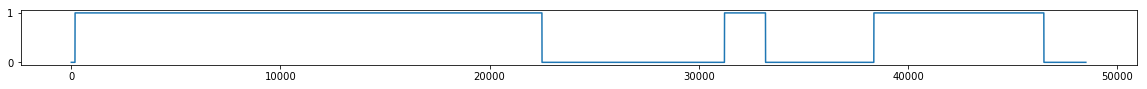

In [27]:
fig, ax = plt.subplots(figsize=(20, 1))
ax.plot(q)